In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import classification_report, silhouette_score, confusion_matrix, adjusted_rand_score, normalized_mutual_info_score, f1_score, accuracy_score, roc_curve, auc
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import xgboost as xgb

from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC

import warnings
warnings.filterwarnings("ignore")

# 1. Data Exploration

In [5]:
df = pd.read_csv("/kaggle/input/heart-attack-dataset-1/heart.csv")
df_exploration = df.copy()
df_exploration.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [6]:
#Check number of unique value
dict = {}
for i in list(df_exploration.columns):
    dict[i] = df_exploration[i].value_counts().shape[0]

pd.DataFrame(dict,index=["unique count"])

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  \
unique count   41    2   4      49   152    2        3        91     2   

              oldpeak  slp  caa  thall  output  
unique count       40    3    5      4       2

In [7]:
# 1. Basic Data Information
print("Dataset Shape:", df_exploration.shape)
print("\nData Info:")
print(df_exploration.info())
print("\nMissing Values:")
print(df_exploration.isnull().sum())
print("\nBasic Statistics:")
print(df_exploration.describe())

Dataset Shape: (303, 14)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB
None

Missing Values:
age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa   

In [8]:
categorial_cols = ['sex','exng','caa','cp','fbs','restecg','slp','thall']
continous_cols = ["age","trtbps","chol","thalachh","oldpeak"]
target_col = ["output"]
print("The categorial cols are : ", categorial_cols)
print("The continuous cols are : ", continous_cols)
print("The target variable is :  ", target_col)

The categorial cols are :  ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall']
The continuous cols are :  ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
The target variable is :   ['output']


In [9]:
df_exploration.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
# Check repeated data
print('Number of repeated data:',df_exploration.duplicated().sum())
print(df_exploration[df_exploration.duplicated()])

Number of repeated data: 1
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1  


In [11]:
# Drop duplicated data
df_exploration = df_exploration.drop_duplicates()
df_exploration

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

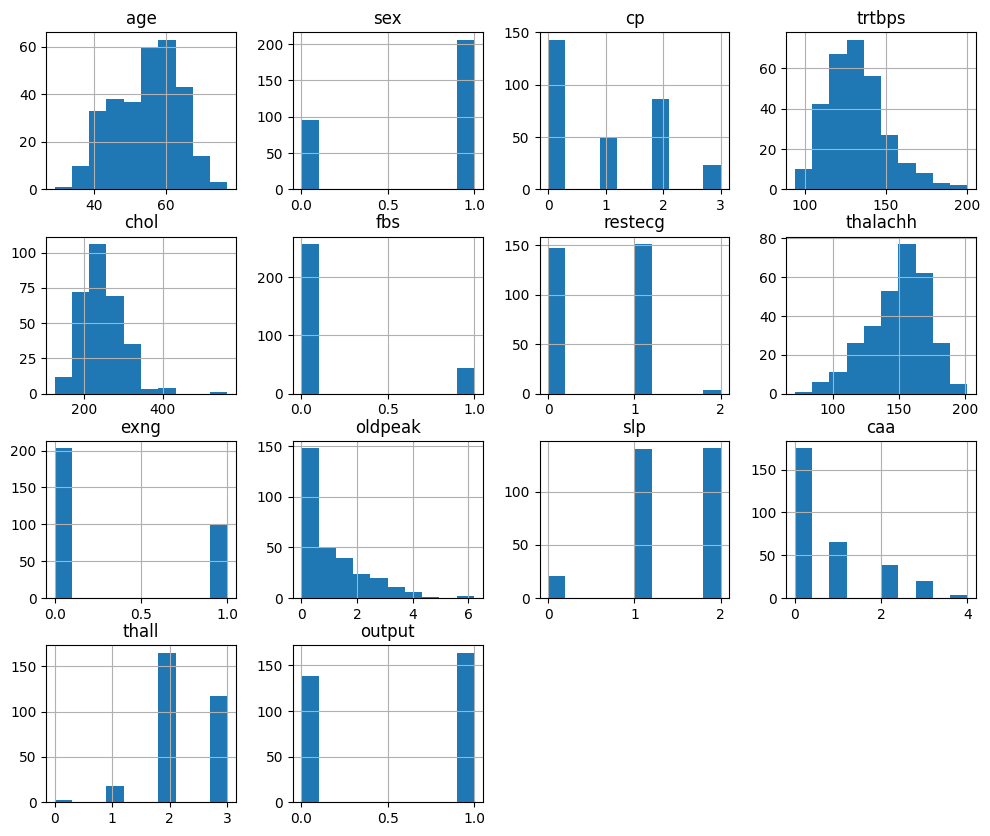

In [12]:
df_exploration.hist(figsize=(12,10))
plt.show()

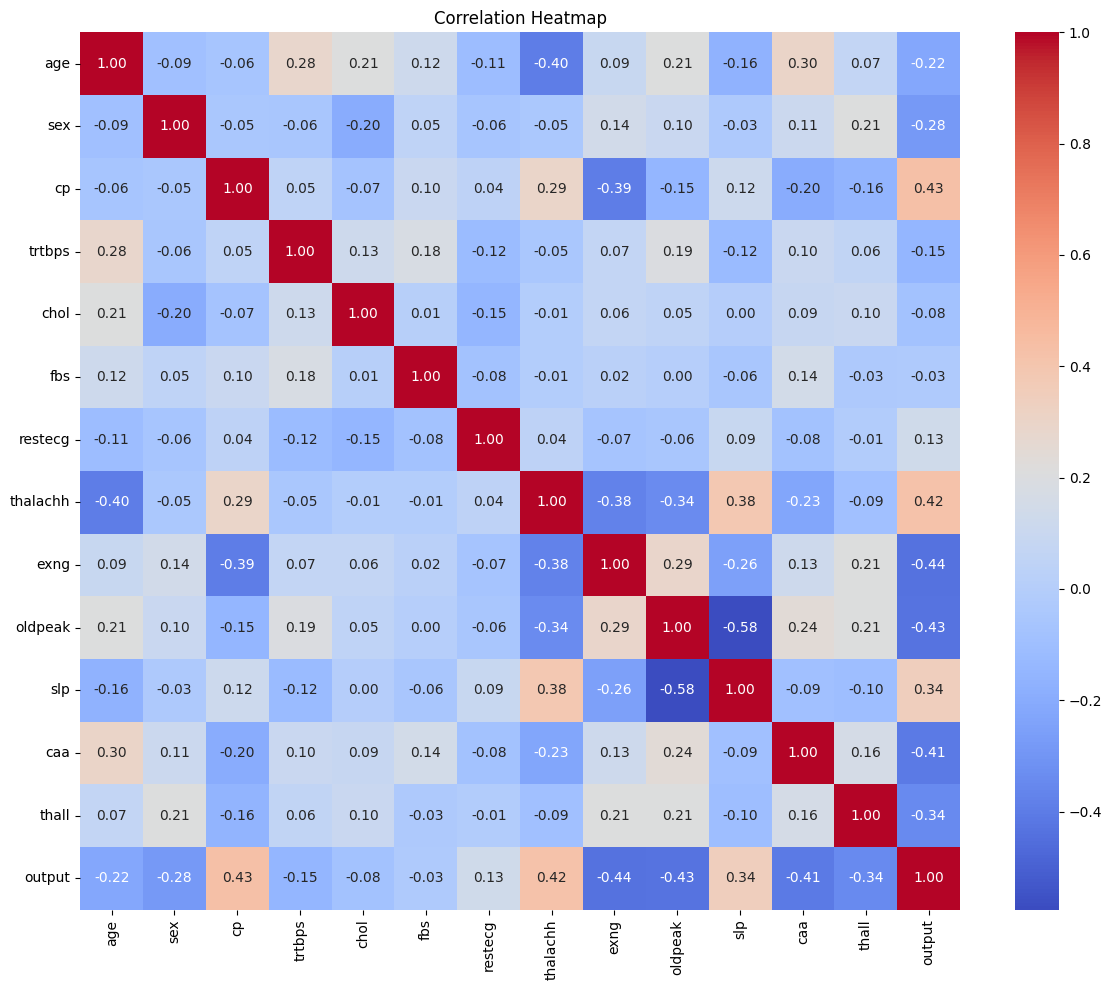

In [13]:
# Correlation Analysis
plt.figure(figsize=(12, 10))
correlation_matrix = df_exploration.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

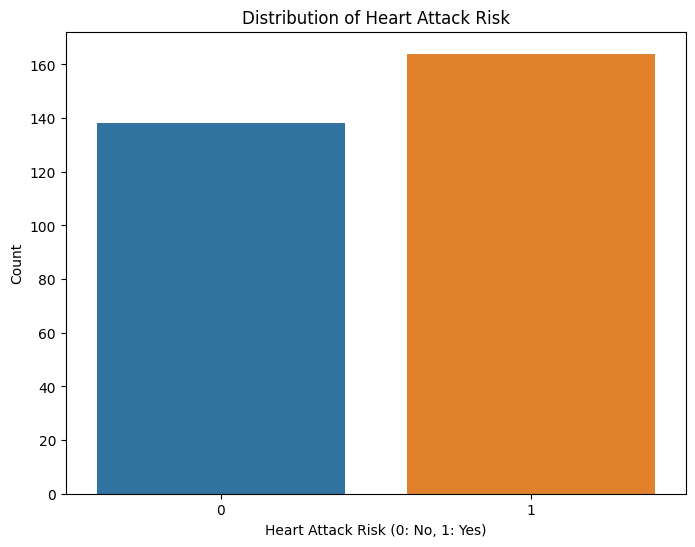

In [14]:
# Distribution of Target Variable
plt.figure(figsize=(8, 6))
sns.countplot(x='output', data=df_exploration)
plt.title('Distribution of Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0: No, 1: Yes)')
plt.ylabel('Count')
plt.show()

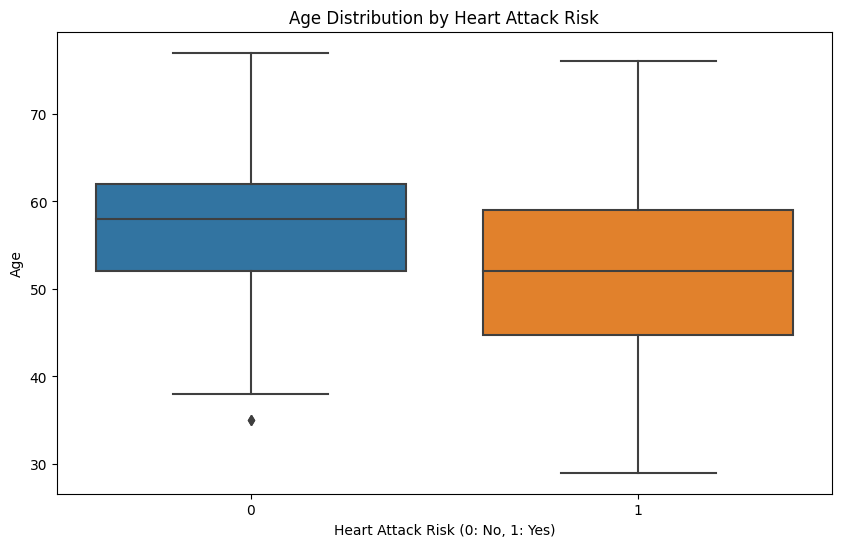

In [15]:
# Age Distribution by Heart Attack Risk
plt.figure(figsize=(10, 6))
sns.boxplot(x='output', y='age', data=df_exploration)
plt.title('Age Distribution by Heart Attack Risk')
plt.xlabel('Heart Attack Risk (0: No, 1: Yes)')
plt.ylabel('Age')
plt.show()

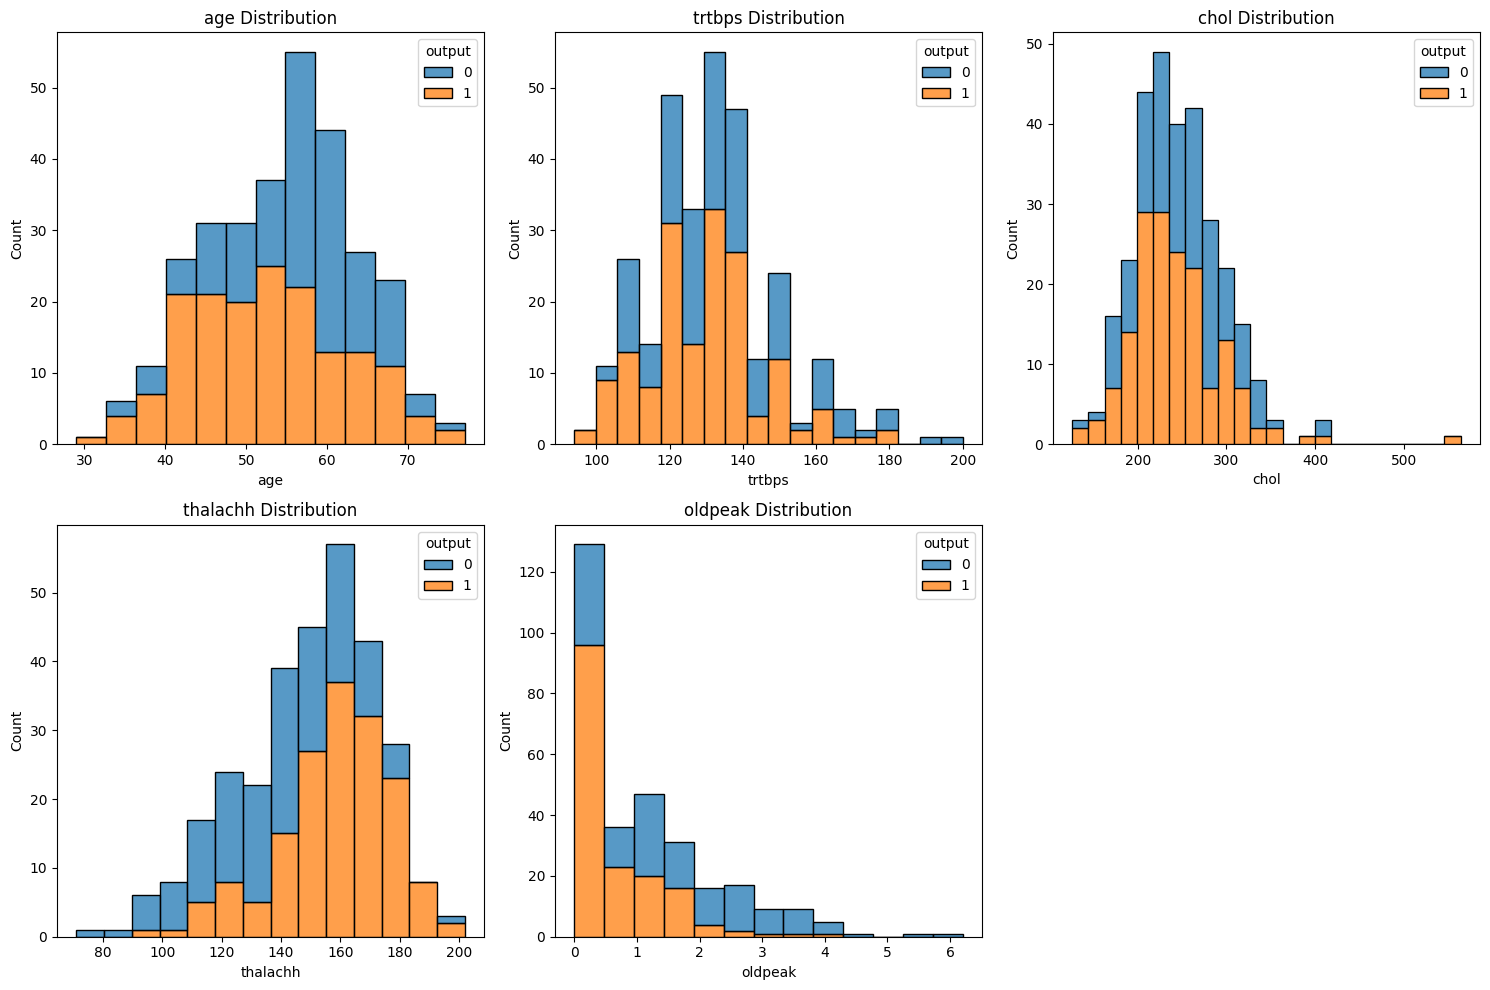

In [16]:
# Feature Distributions
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continous_cols, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=df_exploration, x=feature, hue='output', multiple="stack")
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

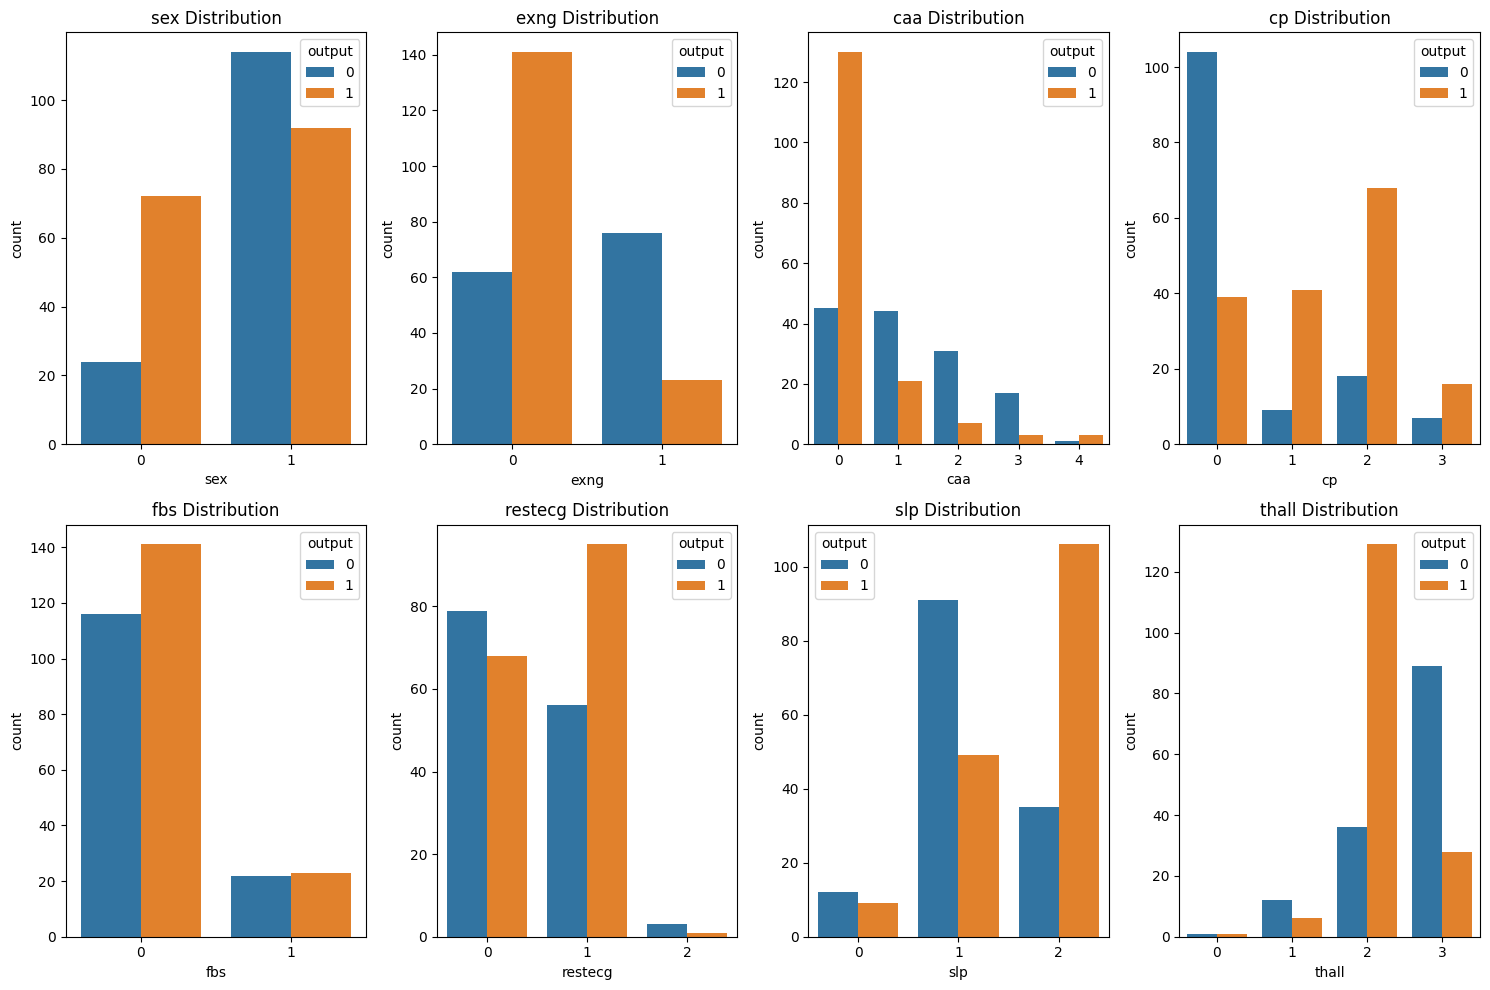

In [17]:
# Categorical Features Analysis
plt.figure(figsize=(15, 10))
for i, feature in enumerate(categorial_cols, 1):
    plt.subplot(2, 4, i)
    sns.countplot(data=df_exploration, x=feature, hue='output')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()

# 2. Data Preprocessing

In [18]:
# Create copy of original data
processed_df = df.copy()

In [19]:
# 1. Drop duplicated data
processed_df = processed_df.drop_duplicates()
processed_df

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      1       1  
1      0      2       1  
2      0      2       1  
3      0      2       1  
4      0      2       1  
..   ...    ...     ...  
298    0      3       0  
299    0      3       0  
300    2      3       0  
301    1      3       0  
302    1      2       0  

[302 rows x 14 columns]

In [20]:
# 2. Handle outliers using IQR method
for feature in continous_cols:
        Q1 = processed_df[feature].quantile(0.25)
        Q3 = processed_df[feature].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        processed_df[feature] = np.where(
            processed_df[feature] > upper_bound,
            upper_bound,
            np.where(
                processed_df[feature] < lower_bound,
                lower_bound,
                processed_df[feature]
            )
        )


In [21]:
# 3. Feature Scaling
scaler = StandardScaler()
processed_df[continous_cols] = scaler.fit_transform(processed_df[continous_cols])

# 3. Feature Engineering

In [22]:

# Add age groups
processed_df['age_group'] = pd.cut(df['age'], bins=[0, 40, 50, 60, 100],labels=['<40', '40-50', '50-60', '>60'])
    
# Add blood pressure category
processed_df['bp_category'] = pd.cut(df['trtbps'], bins=[0, 120, 140, 500], labels=['Normal', 'Pre-high', 'High'])

categorial_cols.append('bp_category')
categorial_cols.append('age_group')



In [23]:
# One-hot encoding
processed_df = pd.get_dummies(processed_df, columns=categorial_cols)

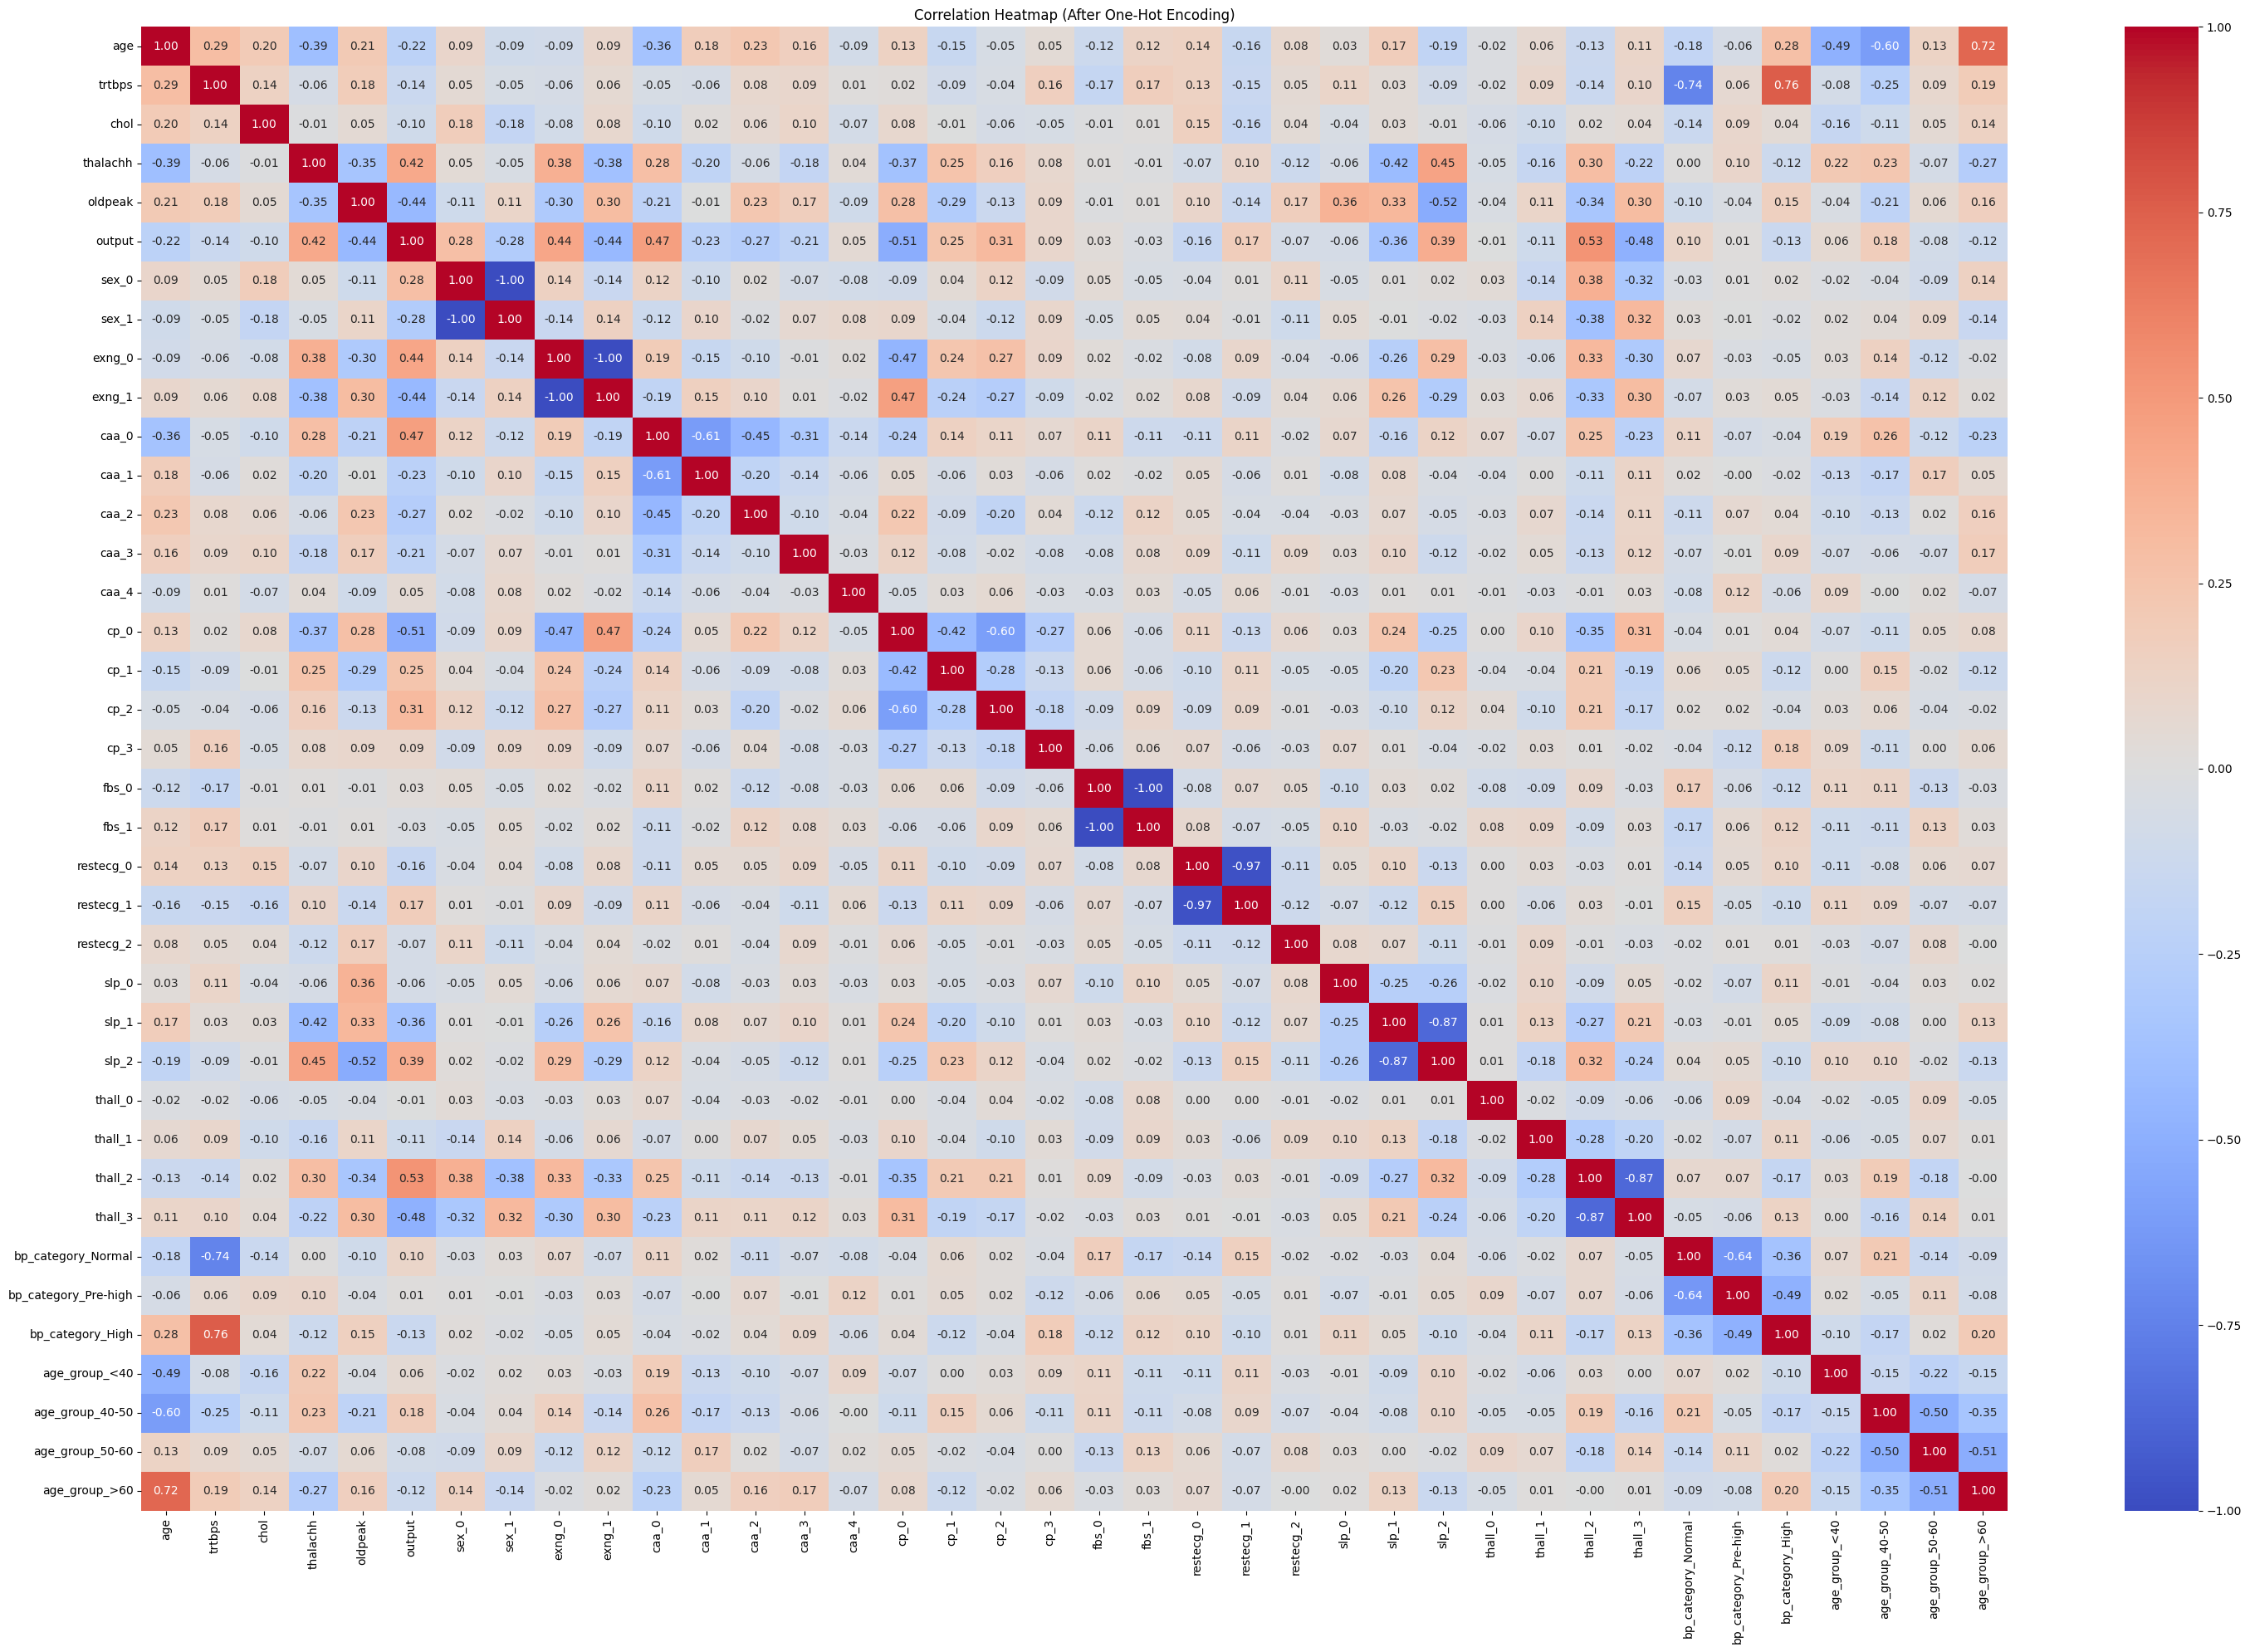

Shape of correlation matrix: (38, 38)


In [24]:
# Create correlation matrix
plt.figure(figsize=(30, 20))
correlation_matrix_processed = processed_df.corr()
sns.heatmap(correlation_matrix_processed, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (After One-Hot Encoding)')
plt.tight_layout()
plt.show()

# Print the shape of the correlation matrix to see how many features we have after one-hot encoding
print(f"Shape of correlation matrix: {correlation_matrix_processed.shape}")

# 4. Model Training

In [25]:
# Load and split data
data = processed_df
X = data.drop('output', axis=1)
y = data['output']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
data

age    trtbps      chol  thalachh   oldpeak  output  sex_0  sex_1  \
0    0.949794  0.828927 -0.261076  0.017027  1.147606       1  False   True   
1   -1.928548 -0.075902  0.097514  1.644957  2.230096       1  False   True   
2   -1.485726 -0.075902 -0.872787  0.984985  0.335739       1   True  False   
3    0.174856 -0.679121 -0.197795  1.248974 -0.205506       1  False   True   
4    0.285561 -0.679121  2.291236  0.589003 -0.385921       1   True  False   
..        ...       ...       ...       ...       ...     ...    ...    ...   
298  0.285561  0.527318 -0.092328 -1.170921 -0.746751       0   True  False   
299 -1.042904 -1.282340  0.392823 -0.774938  0.155324       0  False   True   
300  1.503322  0.768605 -1.104815 -0.378955  2.139889       0  False   True   
301  0.285561 -0.075902 -2.412611 -1.522906  0.155324       0  False   True   
302  0.285561 -0.075902 -0.197795  1.072982 -0.927166       0   True  False   

     exng_0  exng_1  ...  thall_1  thall_2  thall_3  bp_category_Normal  \
0      True   False  ...     True    False    False               False   
1      True   False  ...    False     True    False               False   
2      True   False  ...    False     True    False               False   
3      True   False  ...    False     True    False                True   
4     False    True  ...    False     True    False                True   
..      ...     ...  ...      ...      ...      ...                 ...   
298   False    True  ...    False    False     True               False   
299    True   False  ...    False    False     True                True   
300    True   False  ...    False    False     True               False   
301   False    True  ...    False    False     True               False   
302    True   False  ...    False     True    False               False   

     bp_category_Pre-high  bp_category_High  age_group_<40  age_group_40-50  \
0                   False              True          False            False   
1                    True             False           True            False   
2                    True             False          False             True   
3                   False             False          False            False   
4                   False             False          False            False   
..                    ...               ...            ...              ...   
298                  True             False          False            False   
299                 False             False          False             True   
300                 False              True          False            False   
301                  True             False          False            False   
302                  True             False          False            False   

     age_group_50-60  age_group_>60  
0              False           True  
1              False          False  
2              False          False  
3               True          False  
4               True          False  
..               ...            ...  
298             True          False  
299            False          False  
300            False           True  
301             True          False  
302             True          False  

[302 rows x 38 columns]

In [27]:
# Clean feature names by replacing problematic characters
def clean_feature_names(X):
    # Create a copy of the dataframe
    X_clean = X.copy()
    
    # Clean column names
    new_columns = {}
    for col in X_clean.columns:
        # Replace special characters and spaces
        new_name = col.replace('[', '_').replace(']', '_').replace('<', 'less_than_')\
                     .replace('>', 'greater_than_').replace(' ', '_')
        new_columns[col] = new_name
    
    # Rename columns
    X_clean = X_clean.rename(columns=new_columns)
    return X_clean

# Clean feature names in training and test data
X_train_clean = clean_feature_names(X_train)
X_test_clean = clean_feature_names(X_test)


In [28]:
X_train_clean

age    trtbps      chol  thalachh   oldpeak  sex_0  sex_1  exng_0  \
132 -1.375021 -0.679121  1.046721  0.545004 -0.927166  False   True    True   
203  1.503322  2.336976  0.603757  0.017027  0.516154  False   True   False   
197  1.392616 -0.377511  0.181888  0.589003 -0.746751  False   True    True   
75   0.064151  0.225708  0.097514  0.501006  0.335739   True  False    True   
177  1.060500  0.527318  1.890460  0.369012 -0.927166  False   True    True   
..        ...       ...       ...       ...       ...    ...    ...     ...   
189 -1.485726 -1.282340 -1.547778  0.369012 -0.927166  False   True    True   
71  -0.378671 -2.247491 -0.387636  0.193020 -0.927166  False   True   False   
106  1.614027  1.733756 -0.239982 -0.818936 -0.836958  False   True    True   
271  0.728383  0.165386 -0.239982 -0.202963  1.418229  False   True    True   
102  0.949794  0.527318 -1.062628  1.292972 -0.927166   True  False    True   

     exng_1  caa_0  ...  thall_1  thall_2  thall_3  bp_category_Normal  \
132   False   True  ...    False     True    False                True   
203    True   True  ...    False    False     True               False   
197   False  False  ...    False    False     True               False   
75    False   True  ...    False     True    False               False   
177   False   True  ...    False     True    False               False   
..      ...    ...  ...      ...      ...      ...                 ...   
189   False   True  ...    False    False     True                True   
71     True  False  ...    False    False     True                True   
106   False  False  ...    False     True    False               False   
271   False  False  ...    False     True    False               False   
102   False  False  ...    False     True    False               False   

     bp_category_Pre-high  bp_category_High  age_group_less_than_40  \
132                 False             False                   False   
203                 False              True                   False   
197                  True             False                   False   
75                   True             False                   False   
177                  True             False                   False   
..                    ...               ...                     ...   
189                 False             False                   False   
71                  False             False                   False   
106                 False              True                   False   
271                  True             False                   False   
102                  True             False                   False   

     age_group_40-50  age_group_50-60  age_group_greater_than_60  
132             True            False                      False  
203            False            False                       True  
197            False            False                       True  
75             False             True                      False  
177            False            False                       True  
..               ...              ...                        ...  
189             True            False                      False  
71             False             True                      False  
106            False            False                       True  
271            False            False                       True  
102            False            False                       True  

[241 rows x 37 columns]

In [29]:
X_test_clean

age    trtbps      chol  thalachh   oldpeak  sex_0  sex_1  exng_0  \
180  0.064151  0.044742  2.270143 -0.774938  0.155324  False   True   False   
229  1.060500 -0.377511  1.342029 -0.818936  0.696569  False   True   False   
111  0.285561  1.130537 -2.518079  1.028983 -0.746751  False   True    True   
247  1.281911  1.733756  0.013140 -1.302915 -0.927166  False   True   False   
60   1.835438 -1.282340  0.413916 -0.862934 -0.927166   True  False    True   
..        ...       ...       ...       ...       ...    ...    ...     ...   
250 -0.378671  0.527318  1.110001 -1.214919  2.681134  False   True   False   
104 -0.489377 -0.136224 -1.041535  0.589003 -0.927166  False   True    True   
300  1.503322  0.768605 -1.104815 -0.378955  2.139889  False   True    True   
194  0.617678  0.527318 -1.273563  0.237018  1.779059  False   True    True   
185 -1.153610 -1.161697  0.941253  0.149022 -0.927166  False   True    True   

     exng_1  caa_0  ...  thall_1  thall_2  thall_3  bp_category_Normal  \
180    True  False  ...    False    False     True               False   
229    True   True  ...    False    False     True               False   
111   False  False  ...    False    False     True               False   
247    True  False  ...     True    False    False               False   
60    False  False  ...    False     True    False                True   
..      ...    ...  ...      ...      ...      ...                 ...   
250    True  False  ...    False    False     True               False   
104   False   True  ...    False     True    False               False   
300   False  False  ...    False    False     True               False   
194   False   True  ...    False     True    False               False   
185   False  False  ...    False     True    False                True   

     bp_category_Pre-high  bp_category_High  age_group_less_than_40  \
180                  True             False                   False   
229                  True             False                   False   
111                 False              True                   False   
247                 False              True                   False   
60                  False             False                   False   
..                    ...               ...                     ...   
250                  True             False                   False   
104                  True             False                   False   
300                 False              True                   False   
194                  True             False                   False   
185                 False             False                   False   

     age_group_40-50  age_group_50-60  age_group_greater_than_60  
180            False             True                      False  
229            False            False                       True  
111            False             True                      False  
247            False            False                       True  
60             False            False                       True  
..               ...              ...                        ...  
250            False             True                      False  
104             True            False                      False  
300            False            False                       True  
194            False             True                      False  
185             True            False                      False  

[61 rows x 37 columns]

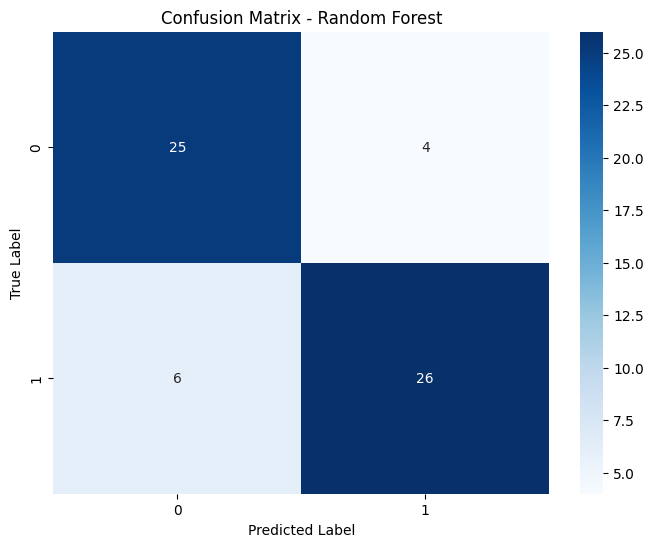


Results for Random Forest:
Best Parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83        29
           1       0.87      0.81      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



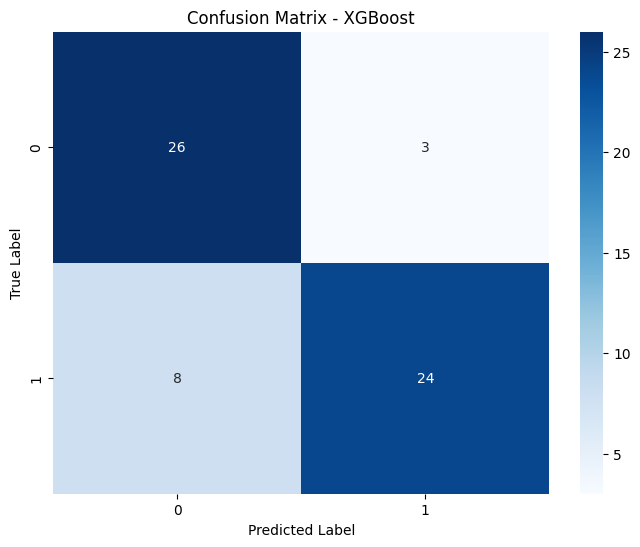


Results for XGBoost:
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.83        29
           1       0.89      0.75      0.81        32

    accuracy                           0.82        61
   macro avg       0.83      0.82      0.82        61
weighted avg       0.83      0.82      0.82        61



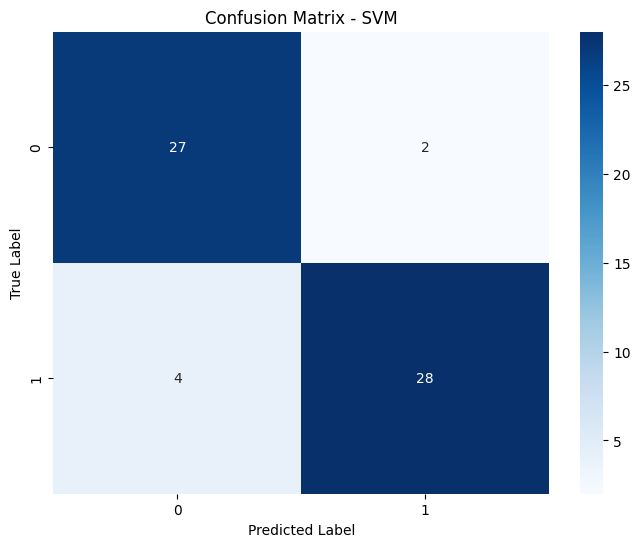


Results for SVM:
Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.93      0.90        29
           1       0.93      0.88      0.90        32

    accuracy                           0.90        61
   macro avg       0.90      0.90      0.90        61
weighted avg       0.90      0.90      0.90        61



In [30]:
# Classification Analysis
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42),
    'SVM': SVC(random_state=42)
}

param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5]
    },
    'XGBoost': {
        'max_depth': [3, 5],
        'learning_rate': [0.01, 0.1],
        'n_estimators': [100, 200]
    },
    'SVM': {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],
        'gamma': ['scale', 'auto']
    }
}

results = {}
for name, model in models.items():
    grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='f1', n_jobs=-1)
    grid_search.fit(X_train_clean, y_train)
    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_clean)
    
    results[name] = {
        'model': best_model,
        'best_params': grid_search.best_params_,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred)
    }
    
    plt.figure(figsize=(8, 6))
    sns.heatmap(results[name]['confusion_matrix'], annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    print(f"\nResults for {name}:")
    print("Best Parameters:", results[name]['best_params'])
    print("\nClassification Report:")
    print(results[name]['classification_report'])

Random Forest Tree:


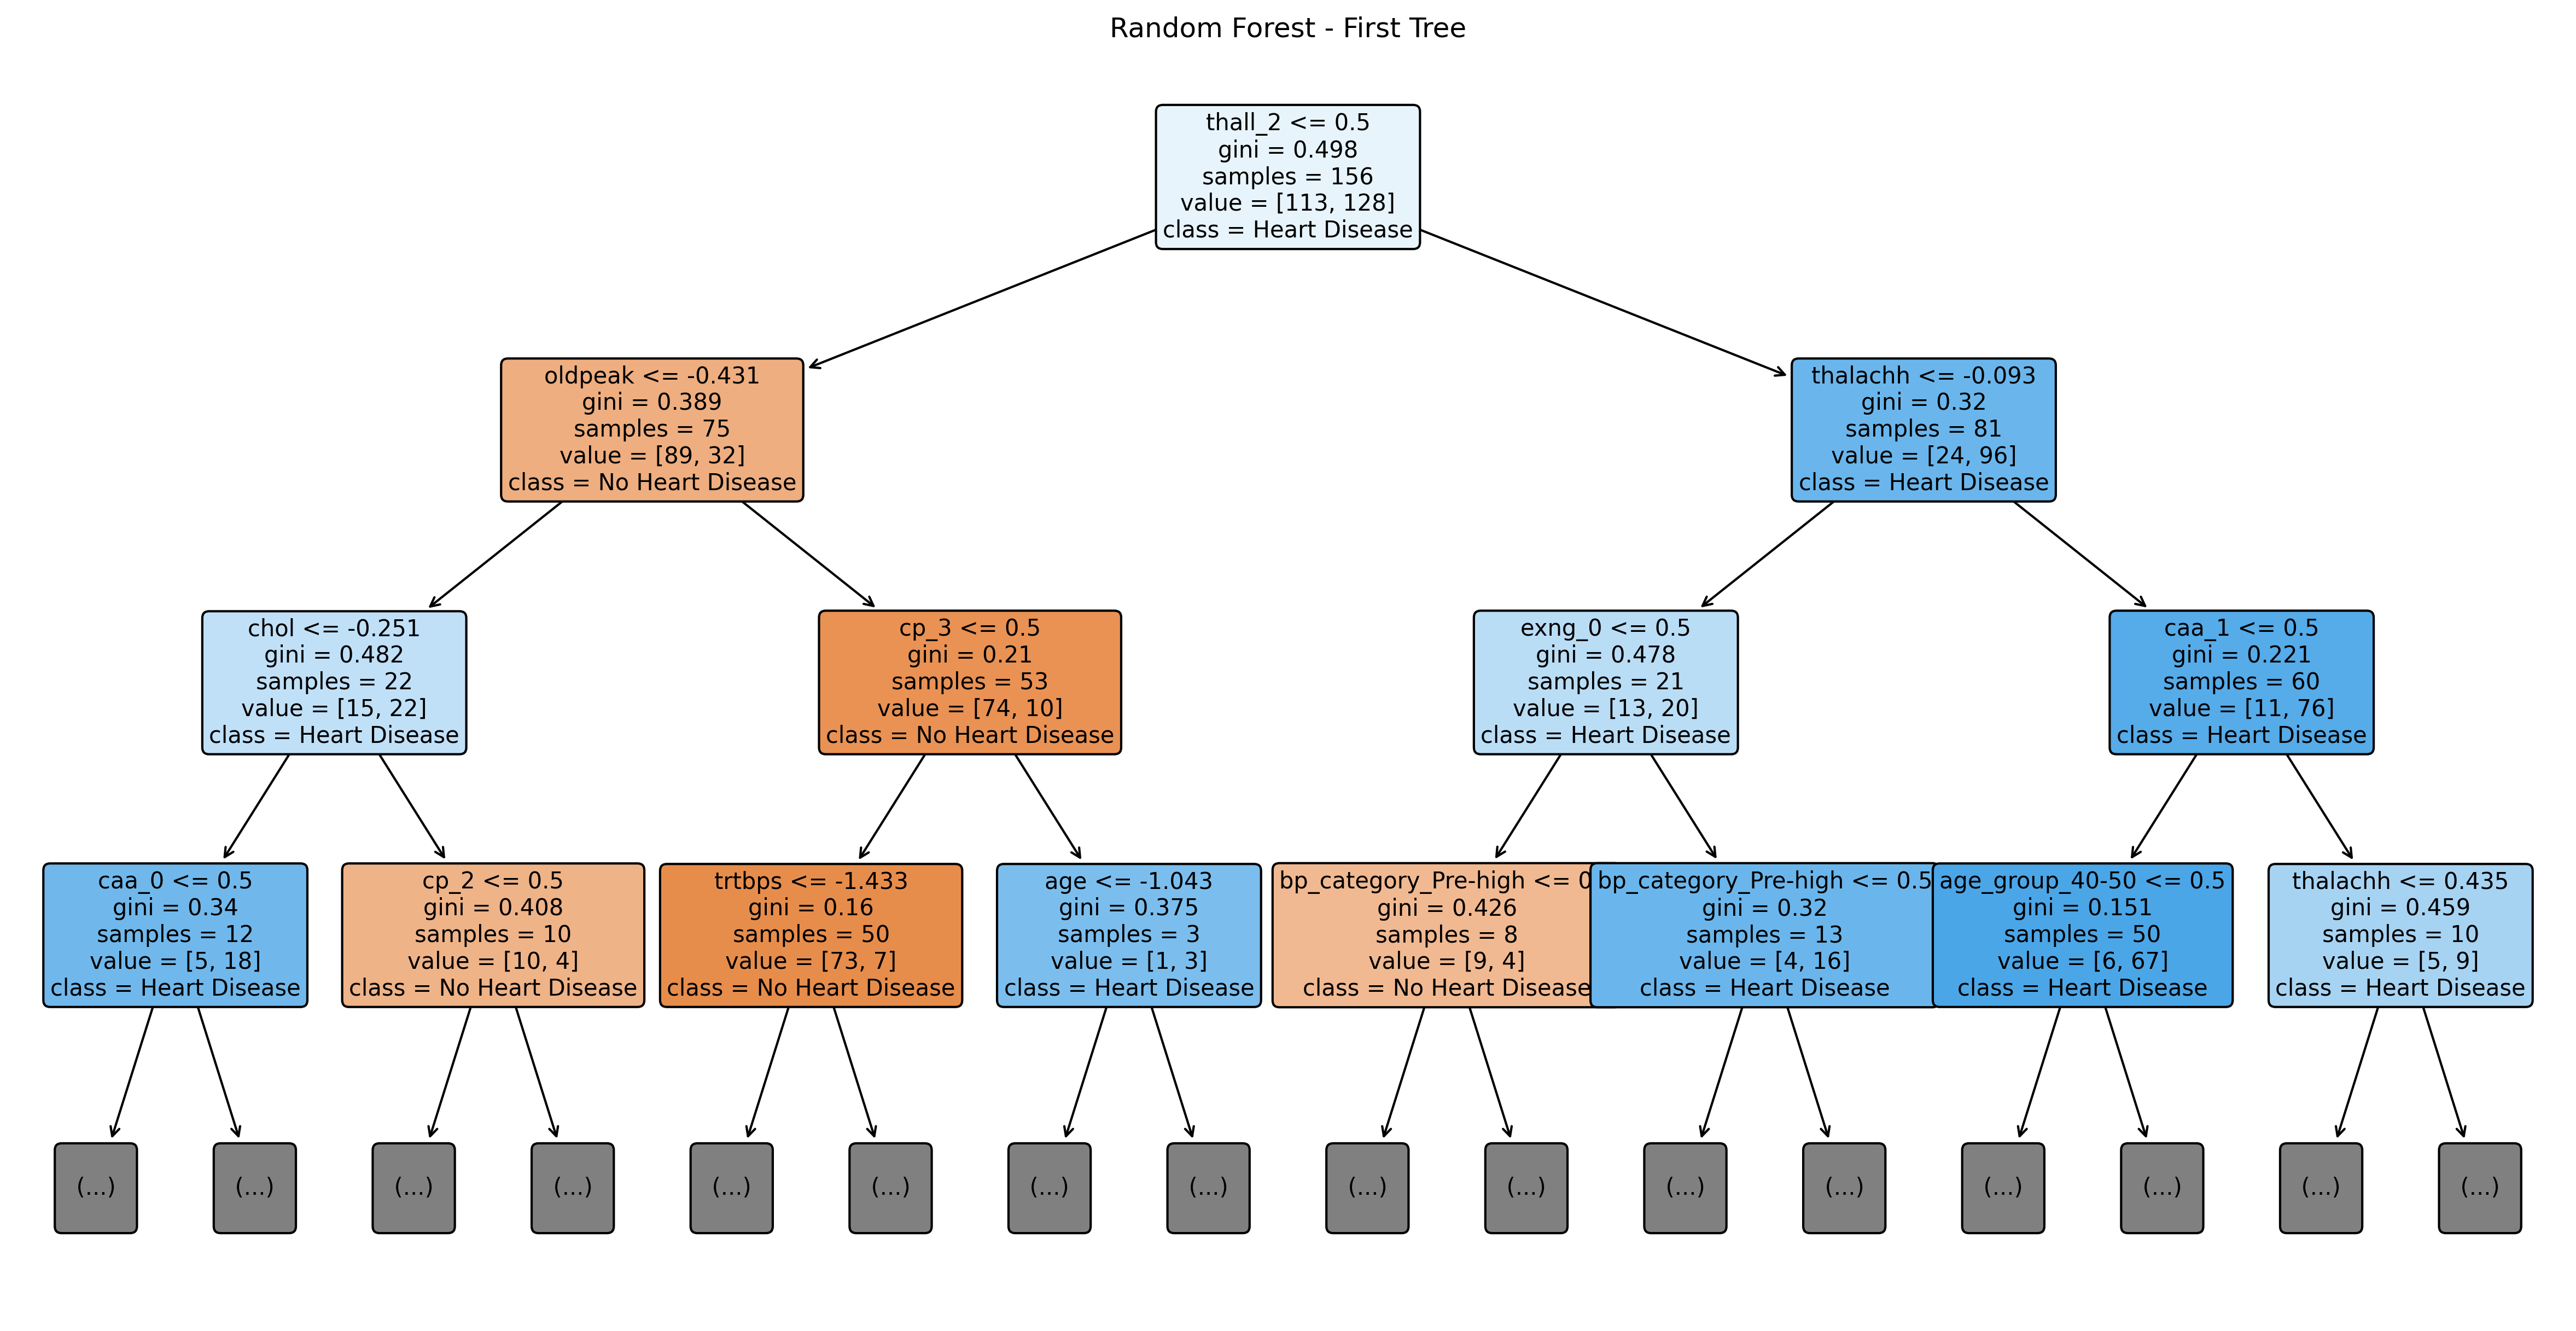


XGBoost Tree:


<Figure size 6000x3000 with 0 Axes>

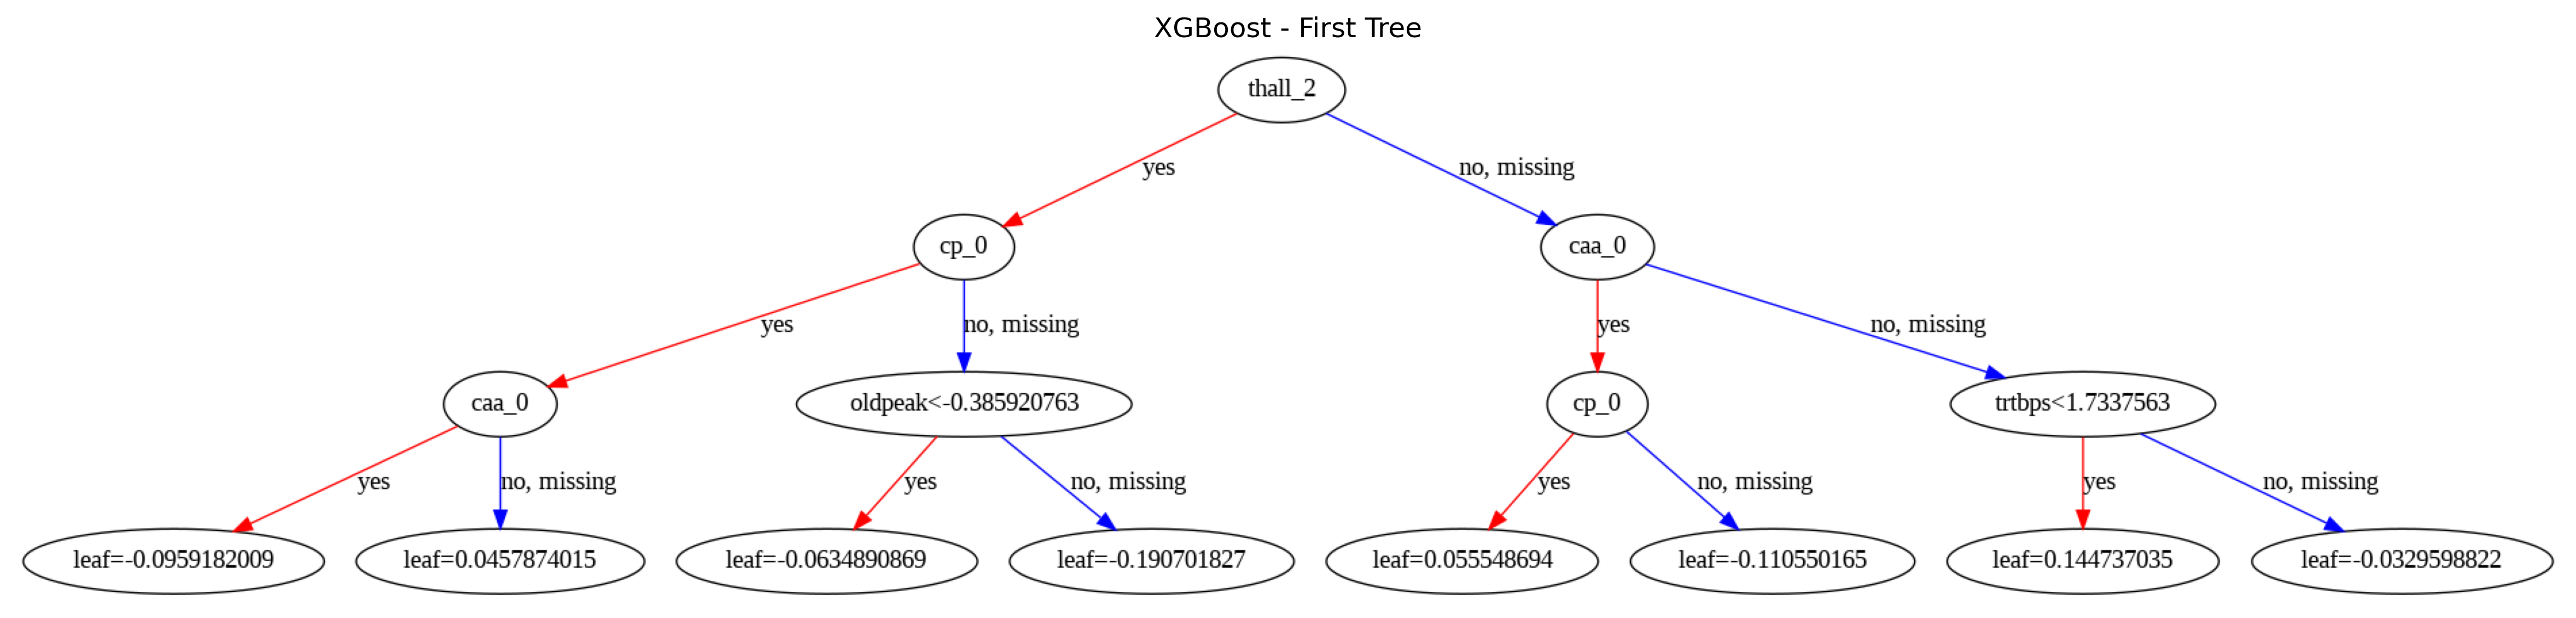

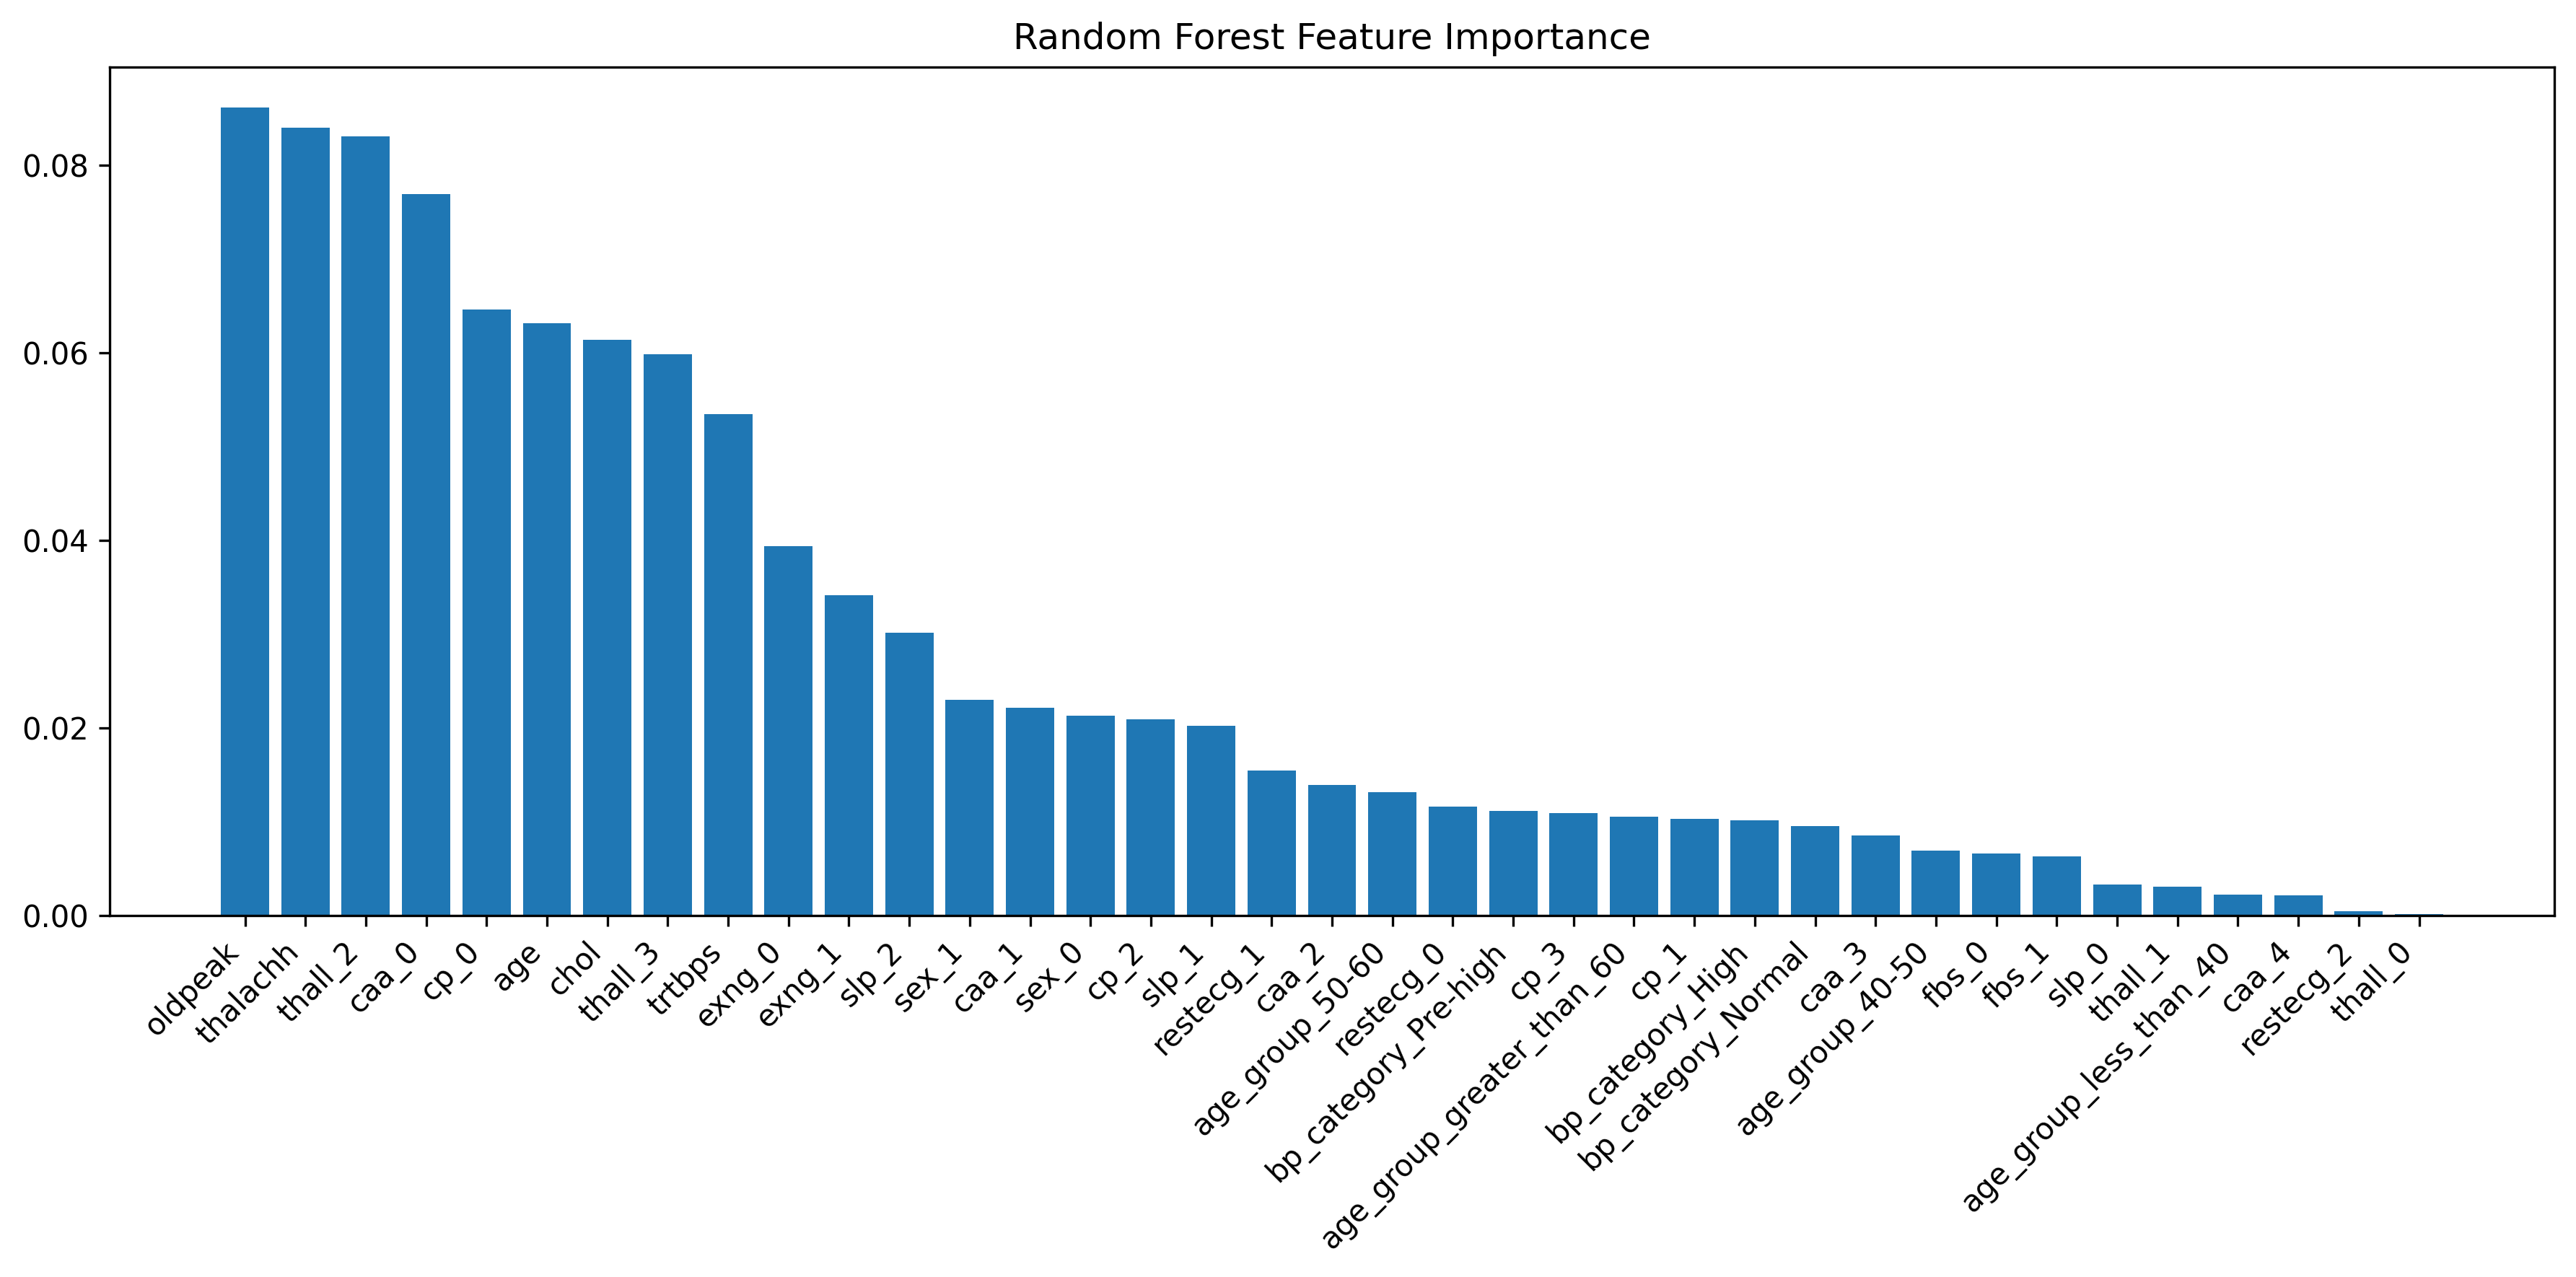

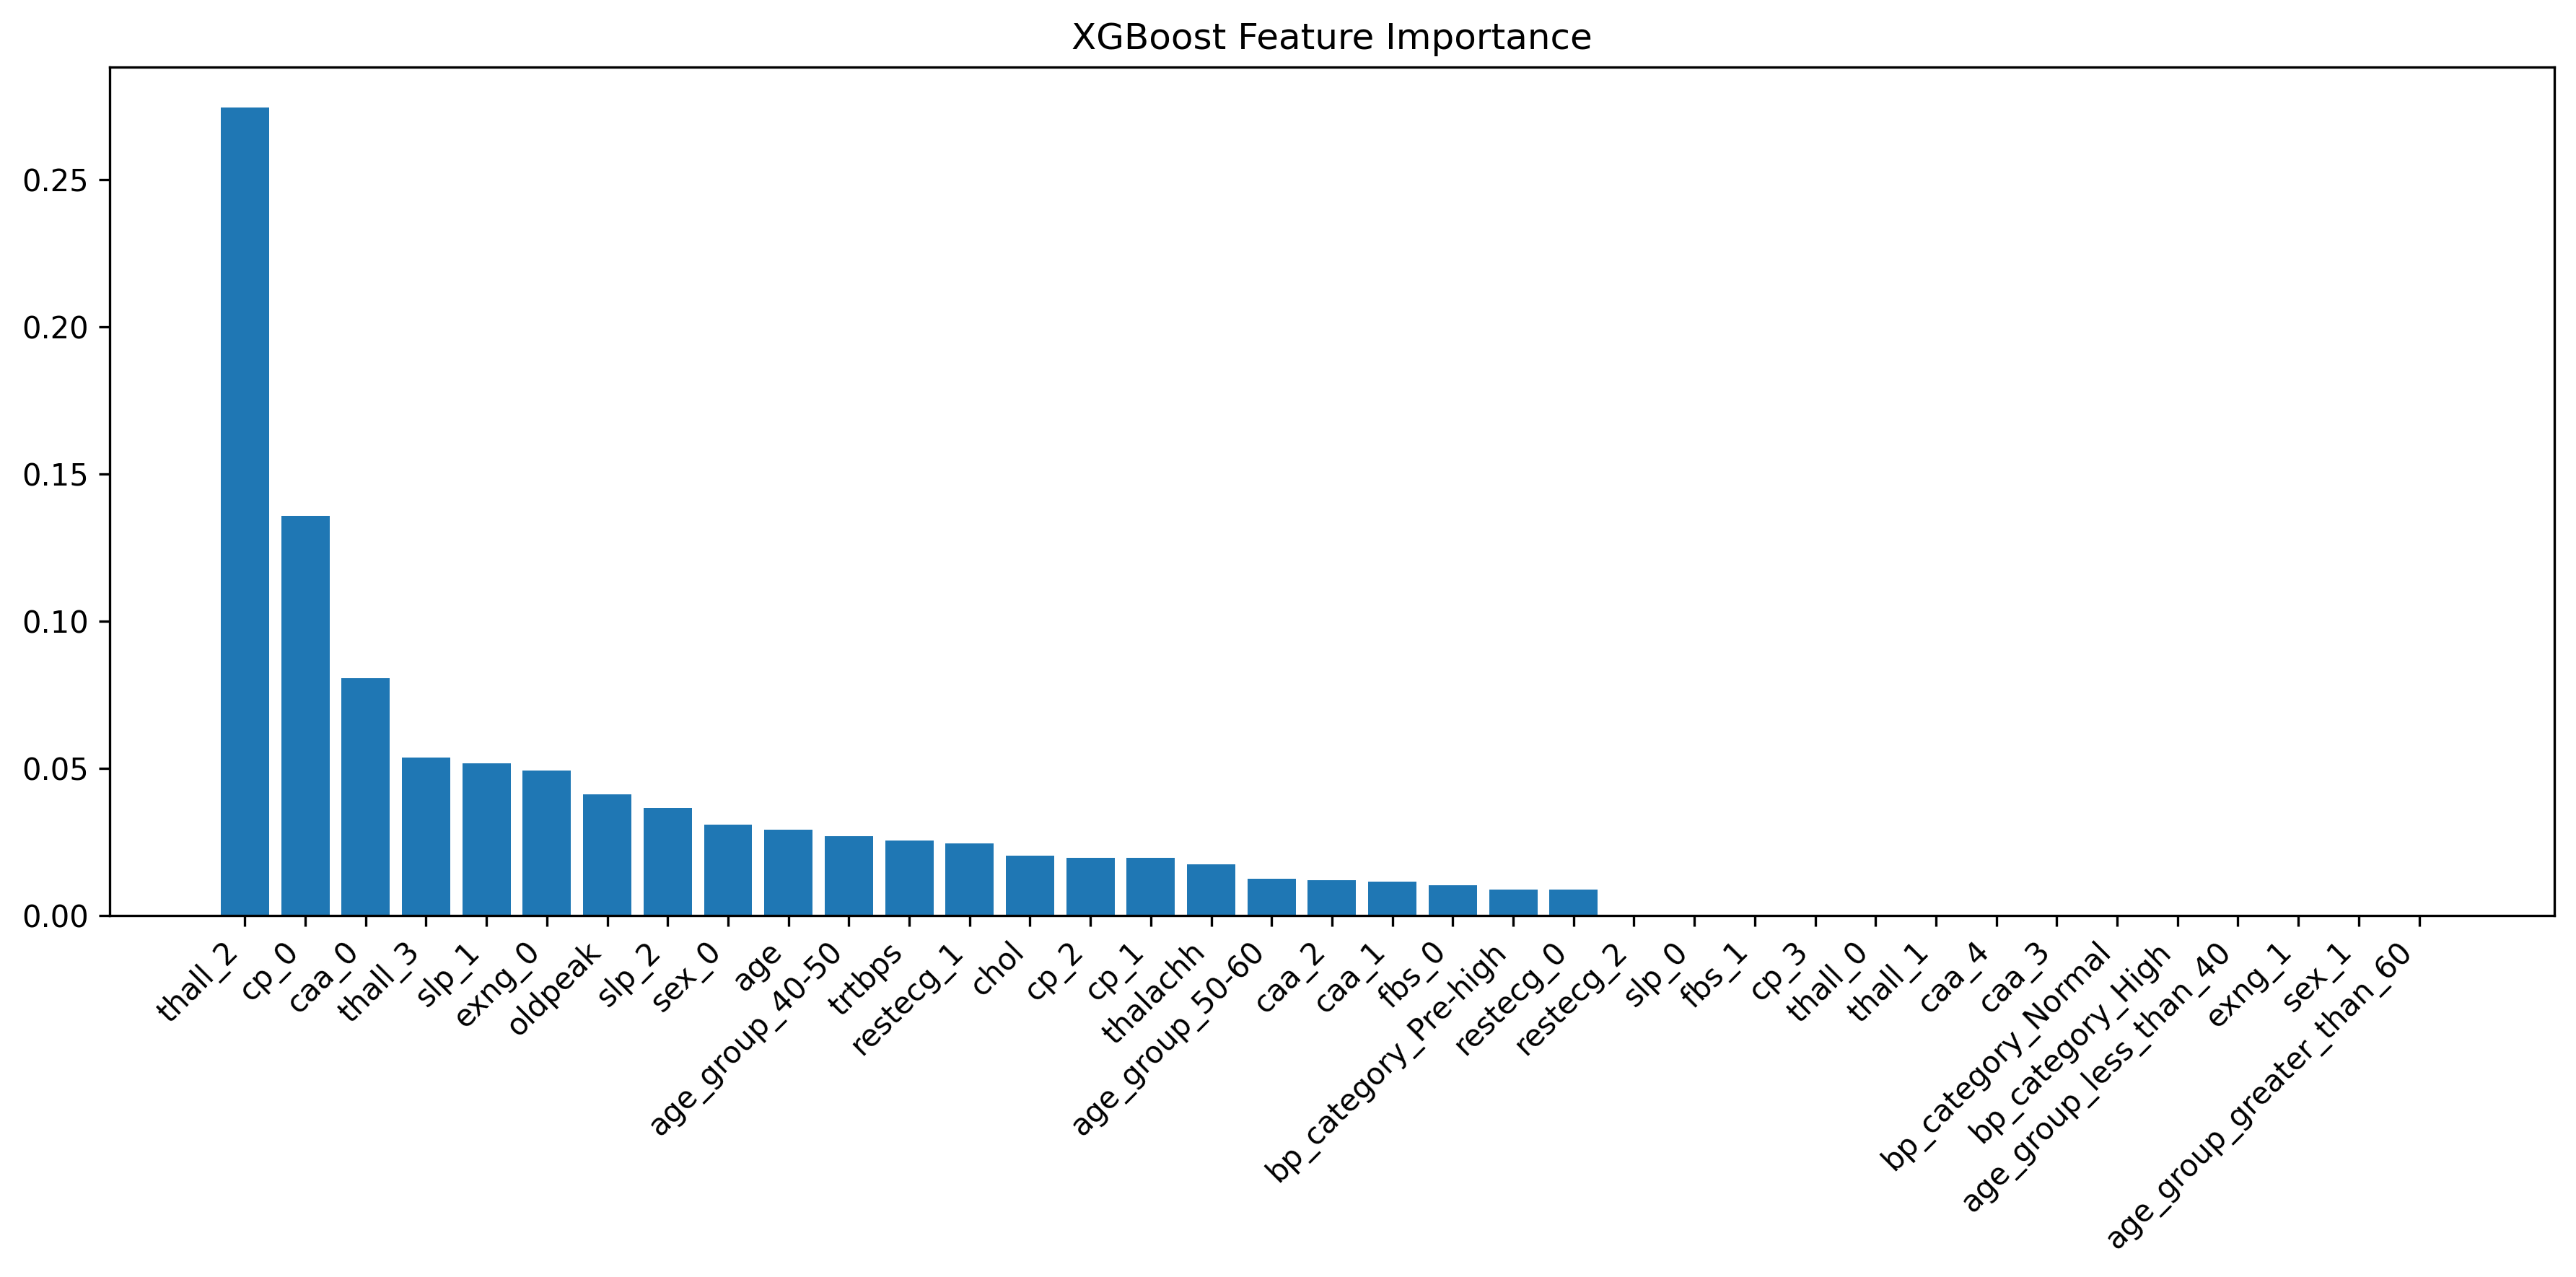

In [31]:


# Set plot style and size for better visibility in Jupyter
plt.style.use('default')
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 300  # Higher DPI for sharper image

# Plot Random Forest Tree
def plot_rf_tree(rf_model, feature_names, class_names):
    plt.figure(figsize=(20,10))
    tree = rf_model.estimators_[0]  # Get the first tree
    plot_tree(tree,
              feature_names=feature_names,
              class_names=class_names,
              filled=True,
              rounded=True,
              fontsize=10,
              max_depth=3)  # Limit depth for visibility
    plt.title("Random Forest - First Tree")
    plt.show()

# Plot XGBoost Tree
def plot_xgb_tree(xgb_model, feature_names):
    plt.figure(figsize=(20,10))
    xgb.plot_tree(xgb_model, num_trees=0, feature_names=feature_names)
    plt.title("XGBoost - First Tree")
    plt.show()

# Example usage
rf_model = results['Random Forest']['model']
xgb_model = results['XGBoost']['model']
feature_names = X_train_clean.columns.tolist()
class_names = ['No Heart Disease', 'Heart Disease']  # Adjust based on your classes

# Plot both trees
print("Random Forest Tree:")
plot_rf_tree(rf_model, feature_names, class_names)

print("\nXGBoost Tree:")
plot_xgb_tree(xgb_model, feature_names)

# Additional visualization: Feature Importance
plt.figure(figsize=(12,6))
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': rf_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('Random Forest Feature Importance')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12,6))
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'importance': xgb_model.feature_importances_
})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.bar(feature_importance['feature'], feature_importance['importance'])
plt.xticks(rotation=45, ha='right')
plt.title('XGBoost Feature Importance')
plt.tight_layout()
plt.show()

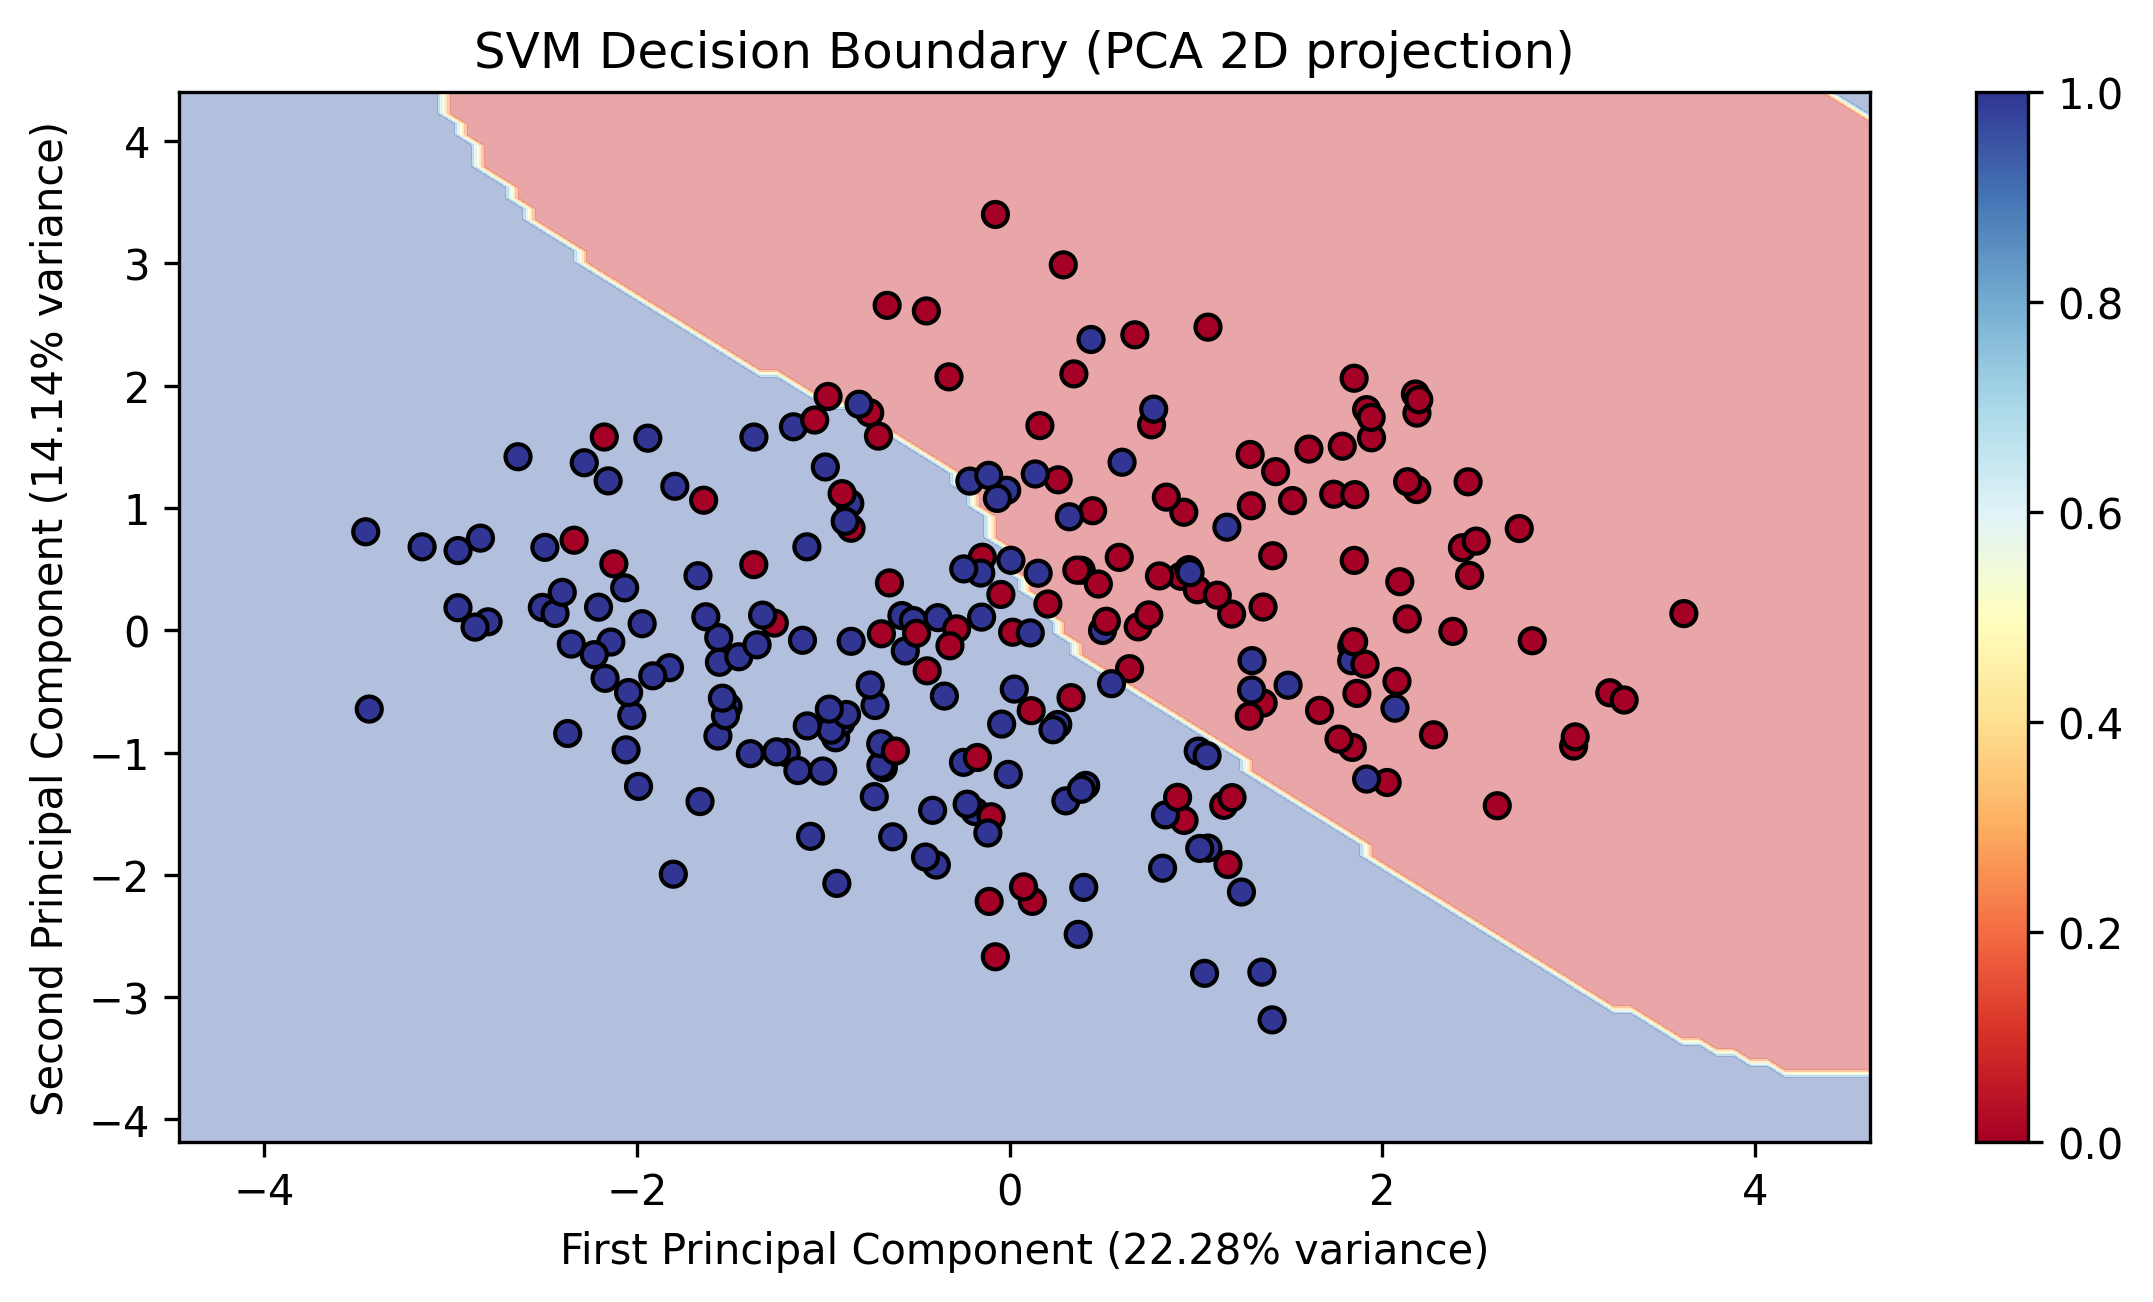

In [32]:
def visualize_svm_results(svm_model, X, y, X_test, y_test):
    # Convert to numpy array if input is pandas DataFrame
    if hasattr(X, 'values'):
        X = X.values
    if hasattr(X_test, 'values'):
        X_test = X_test.values
    
    # Create figure with subplots
    plt.figure(figsize=(20, 10))
    
    # 1. PCA Transformation and Decision Boundary
    plt.subplot(2, 2, 1)
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    X_test_pca = pca.transform(X_test)
    
    # Fit a new SVM model on PCA data
    svm_pca = SVC(kernel=svm_model.kernel, C=svm_model.C, probability=True)
    svm_pca.fit(X_pca, y)
    
    # Create mesh grid for decision boundary
    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
    
    # Plot decision boundary
    Z = svm_pca.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    
    # Plot training points
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')
    plt.title('SVM Decision Boundary (PCA 2D projection)')
    plt.xlabel(f'First Principal Component ({pca.explained_variance_ratio_[0]:.2%} variance)')
    plt.ylabel(f'Second Principal Component ({pca.explained_variance_ratio_[1]:.2%} variance)')
    plt.colorbar(scatter)

# Get the SVM model and visualize
svm_model = results['SVM']['model']
visualize_svm_results(svm_model, X_train_clean, y_train, X_test_clean, y_test)

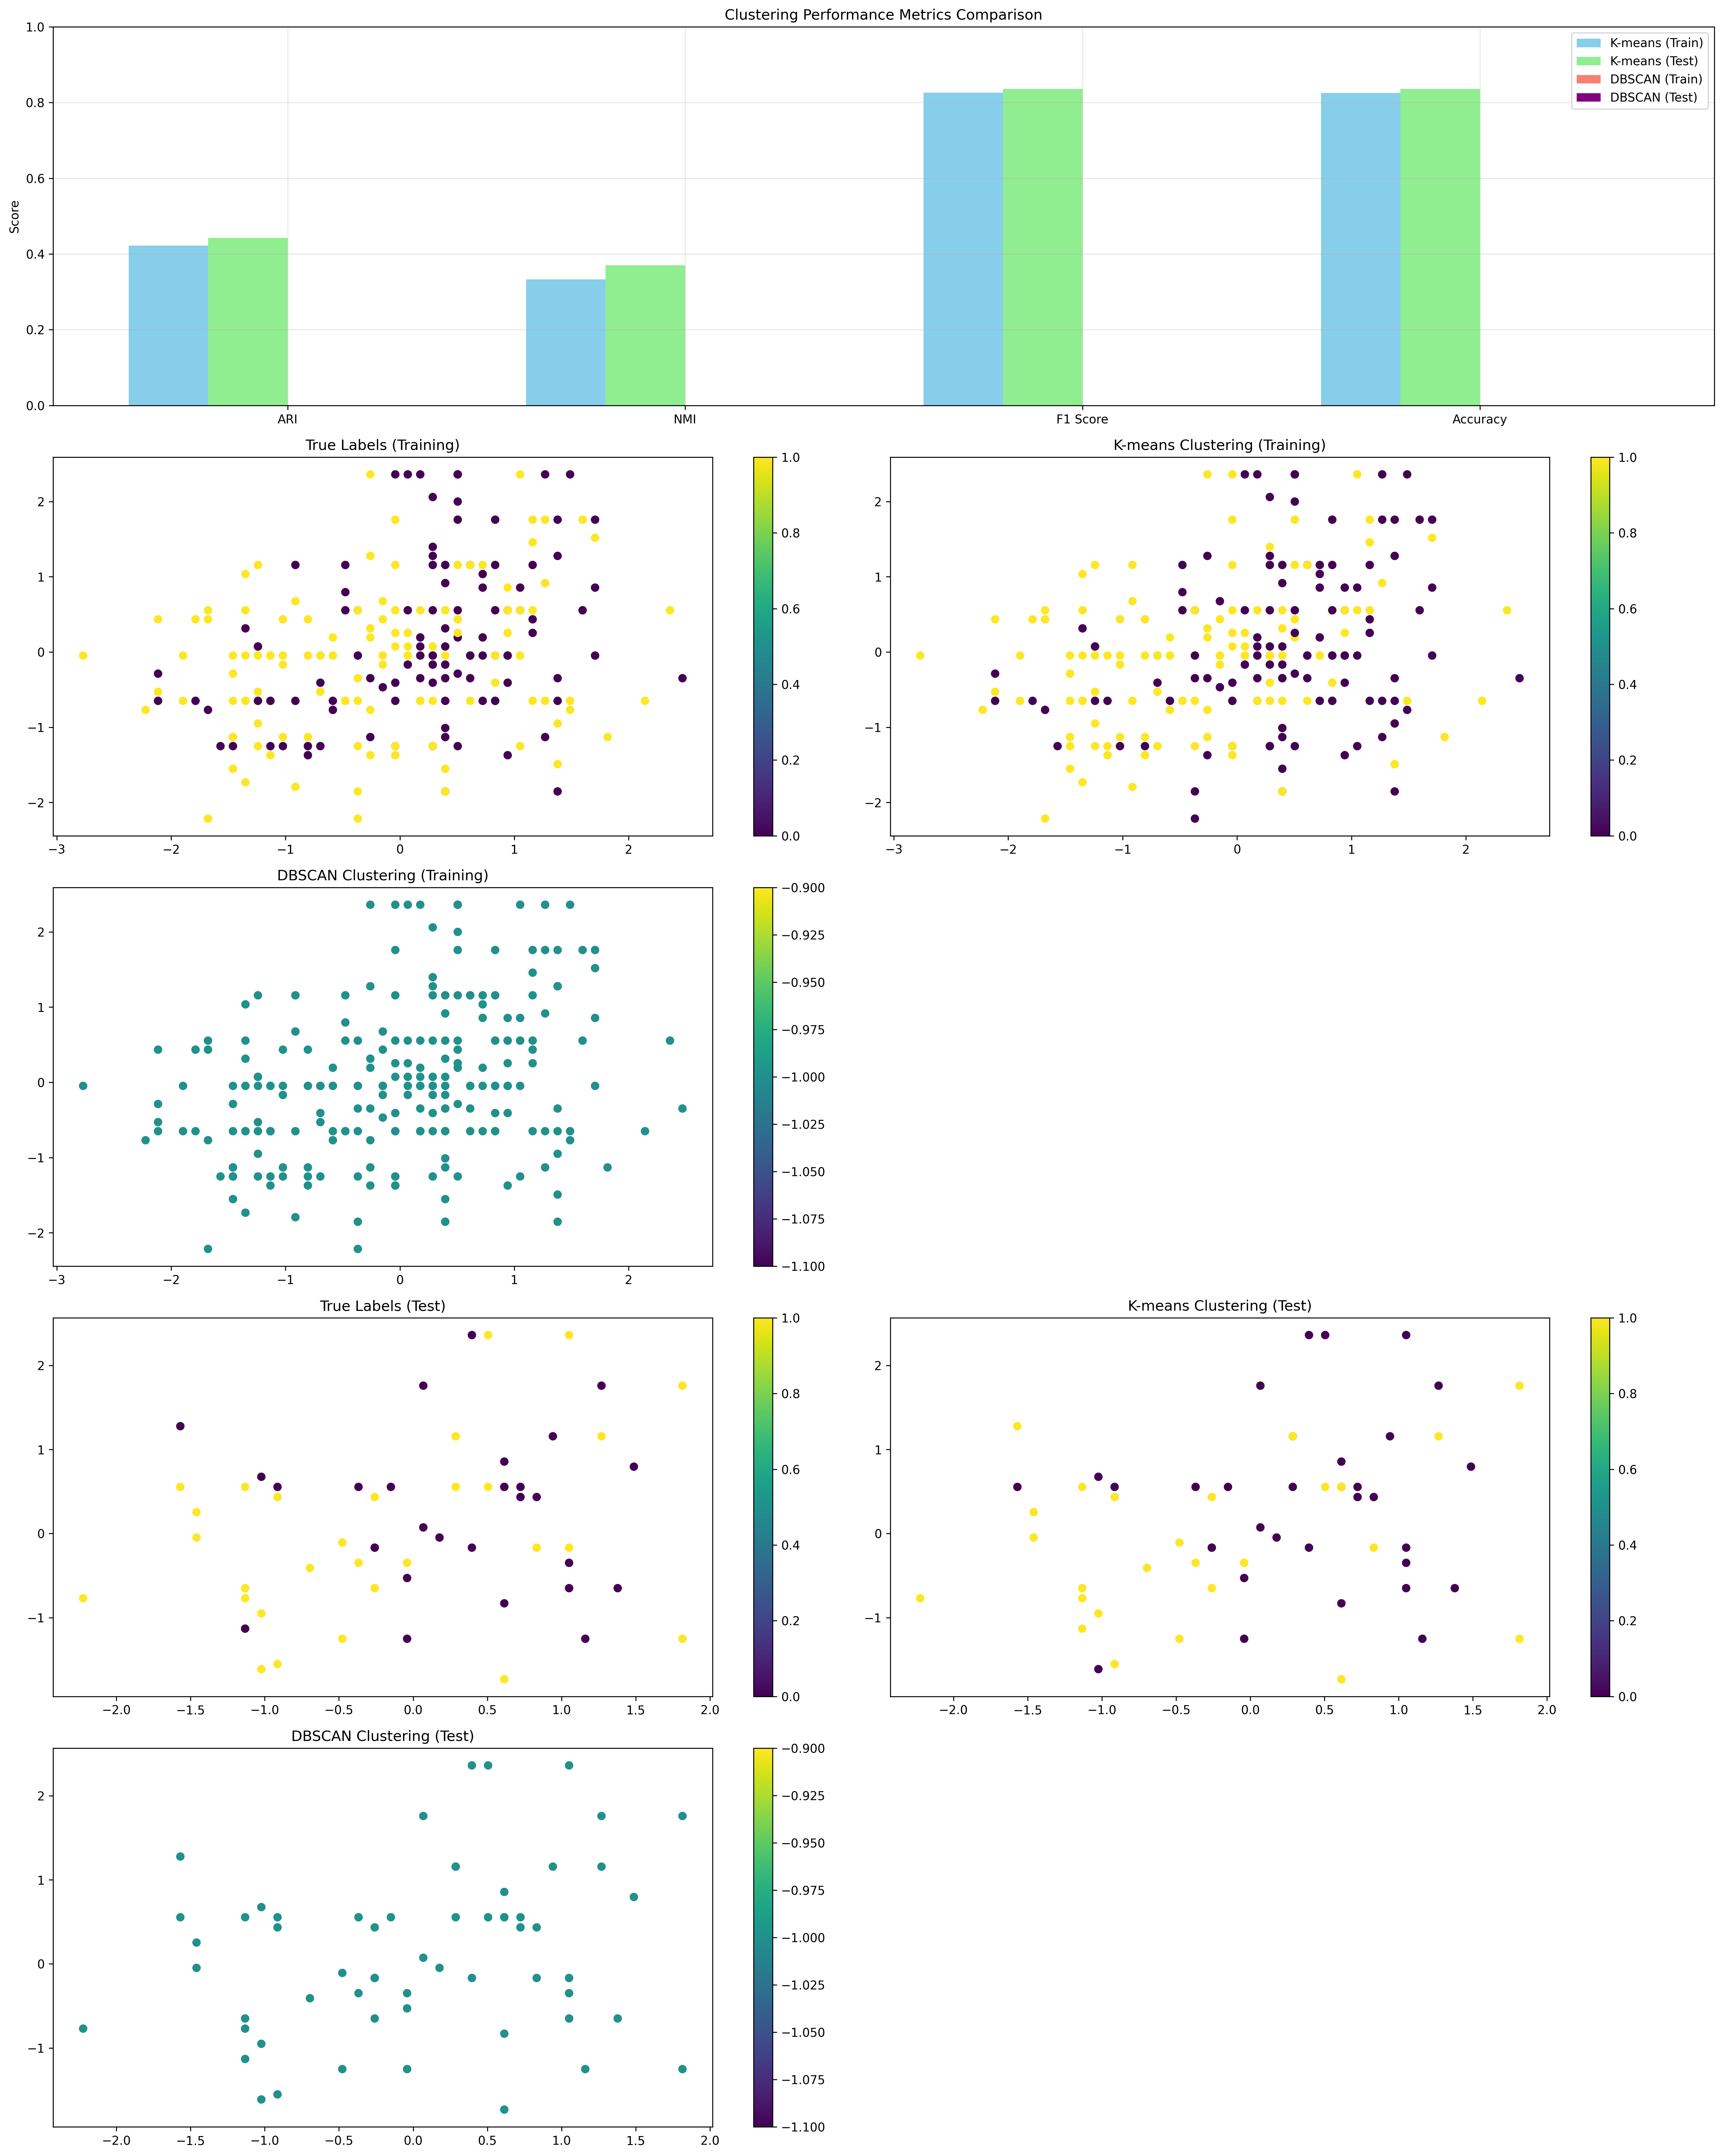

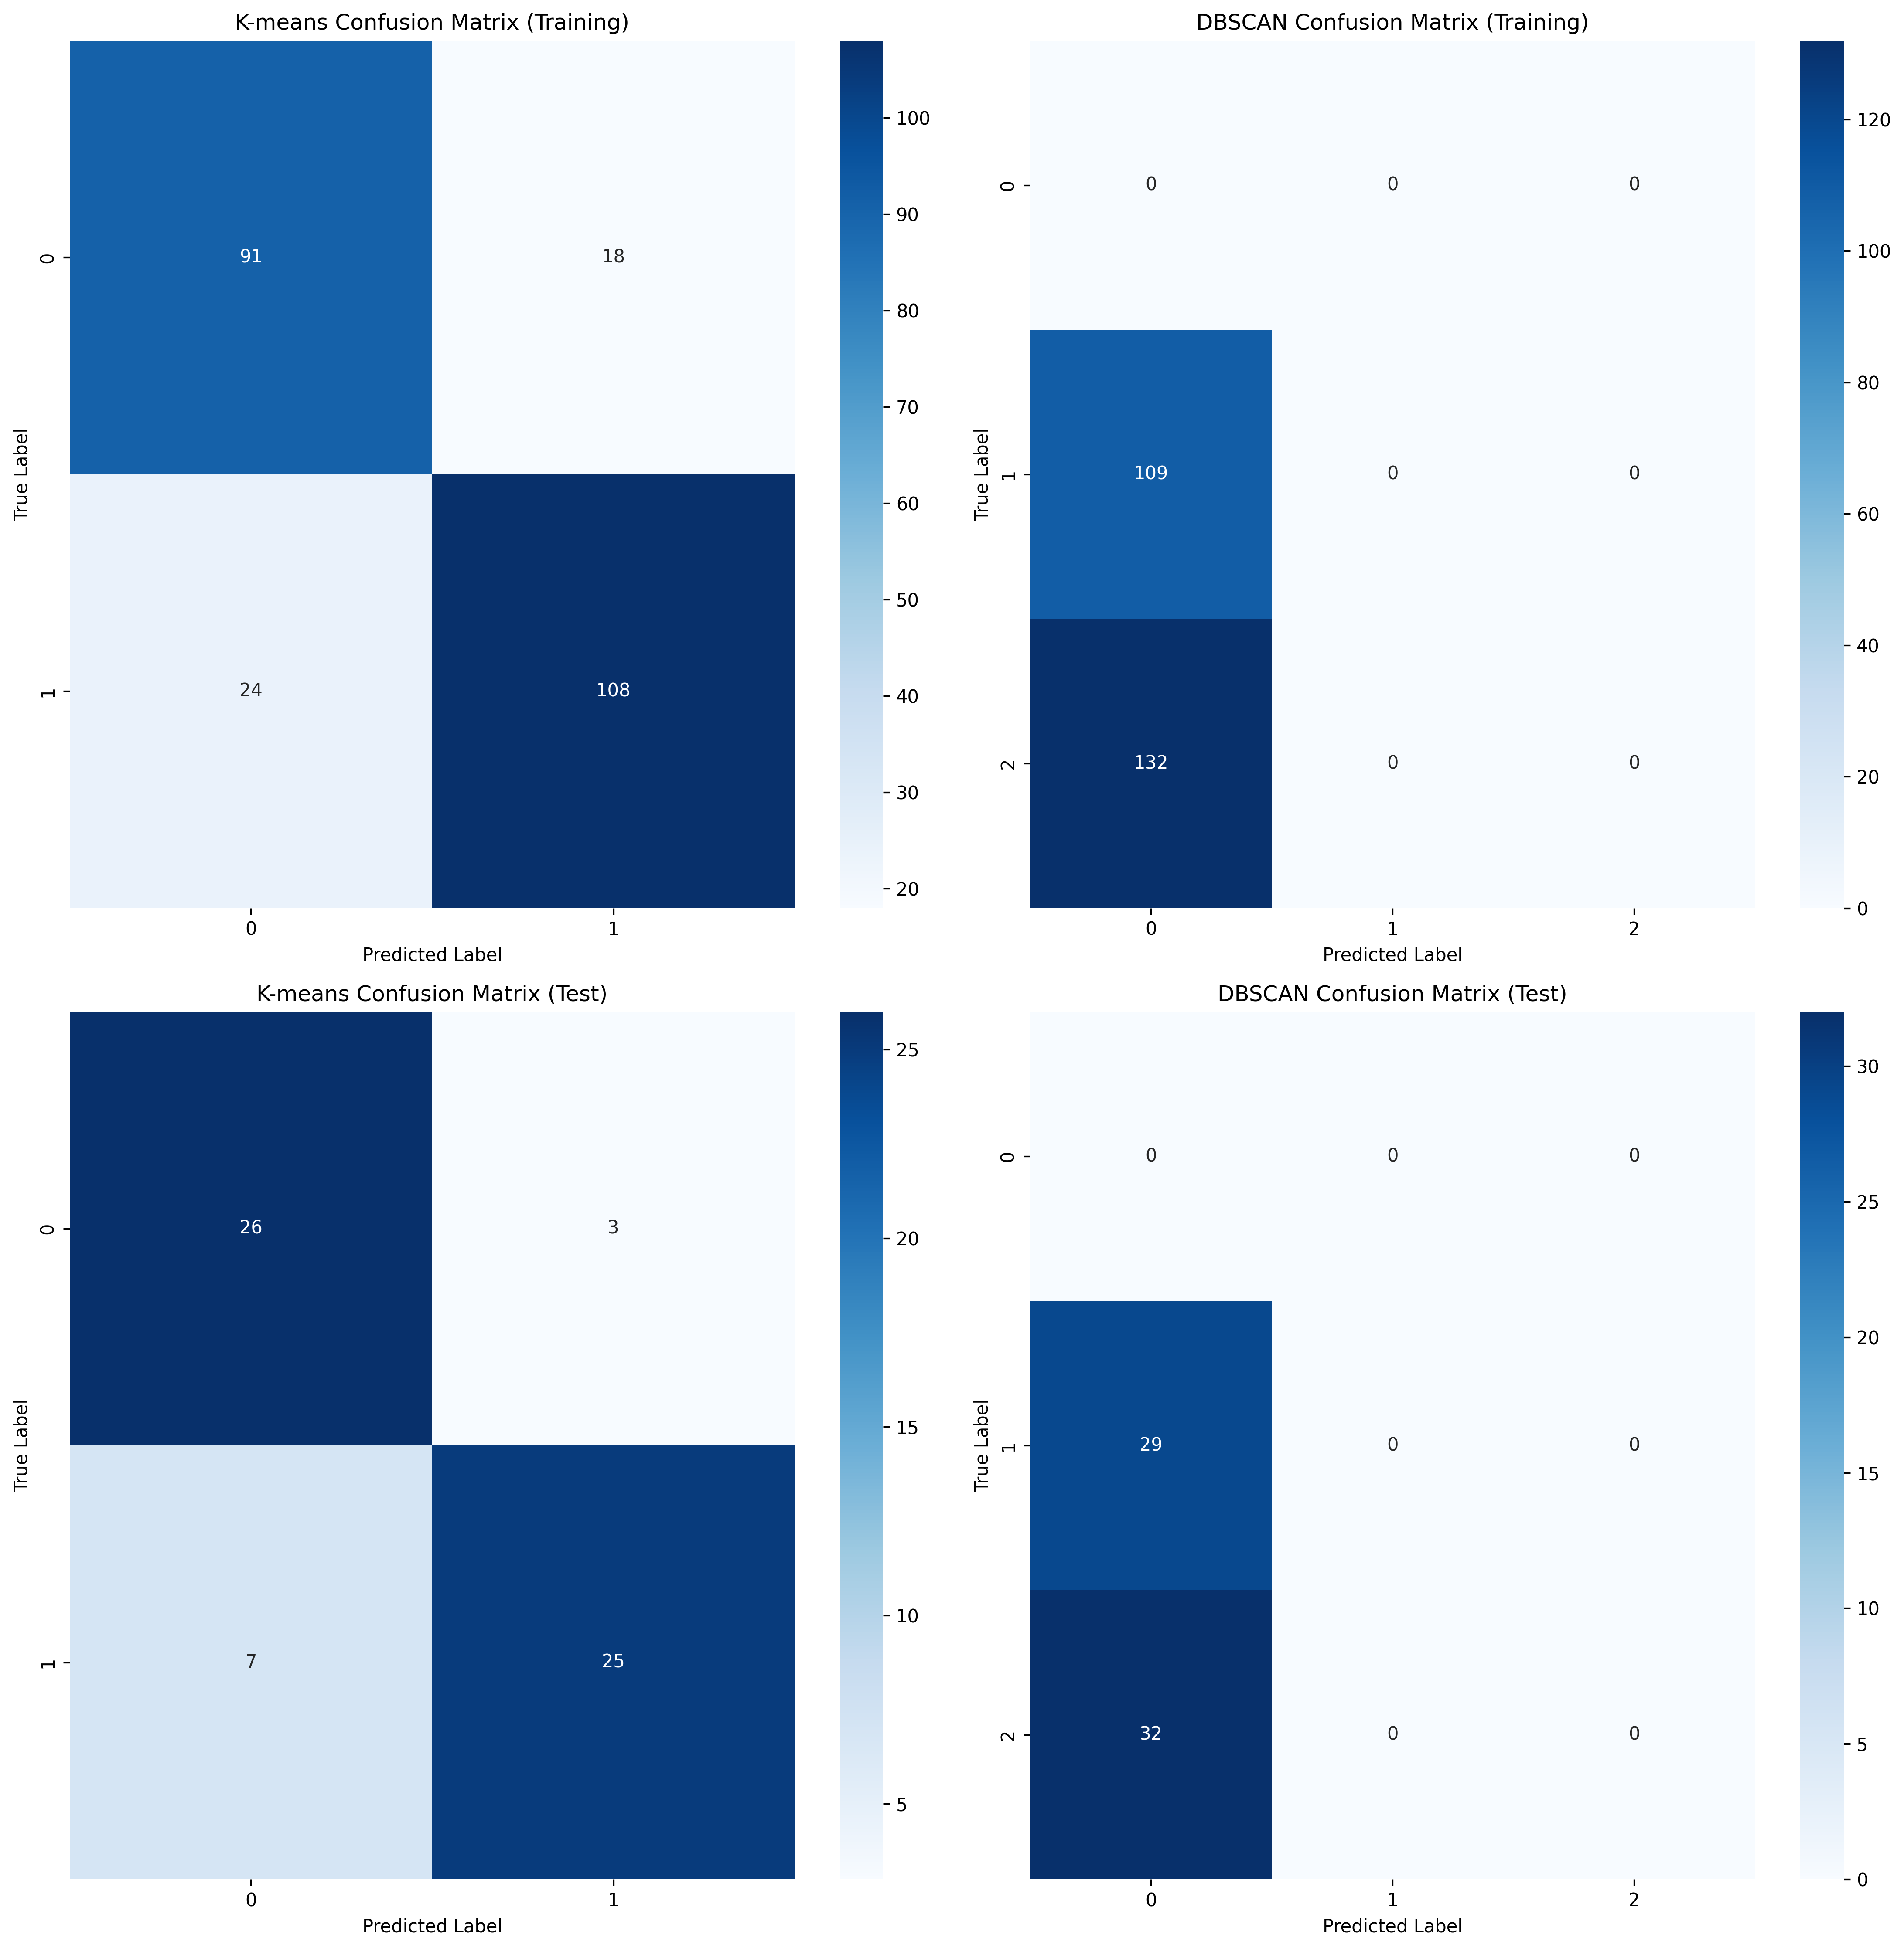


=== Detailed Performance Metrics ===

K-means Clustering:
Training Set:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       109
           1       0.86      0.82      0.84       132

    accuracy                           0.83       241
   macro avg       0.82      0.83      0.82       241
weighted avg       0.83      0.83      0.83       241


Test Set:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84        29
           1       0.89      0.78      0.83        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


DBSCAN Clustering:
Training Set:
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00       0.0
           0       0.00      0.00      0.00     109.0
           1       0.00      0.00      0.00     132.0

    accura

In [33]:
# Clustering Analysis on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_train_scaled)
kmeans_train_labels = kmeans.predict(X_train_scaled)
kmeans_test_labels = kmeans.predict(X_test_scaled)

dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_train_labels = dbscan.fit_predict(X_train_scaled)
dbscan_test_labels = dbscan.fit_predict(X_test_scaled)

# Calculate metrics
def calculate_clustering_metrics(y_true, y_pred):
    ari = adjusted_rand_score(y_true, y_pred)
    nmi = normalized_mutual_info_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred, average='weighted')
    accuracy = accuracy_score(y_true, y_pred)
    return ari, nmi, f1, accuracy

# Calculate metrics for both sets
kmeans_train_metrics = calculate_clustering_metrics(y_train, kmeans_train_labels)
kmeans_test_metrics = calculate_clustering_metrics(y_test, kmeans_test_labels)
dbscan_train_metrics = calculate_clustering_metrics(y_train, dbscan_train_labels)
dbscan_test_metrics = calculate_clustering_metrics(y_test, dbscan_test_labels)

# Create subplots for all visualizations
fig = plt.figure(figsize=(20, 25))
gs = fig.add_gridspec(5, 2)

# 1. Metrics Comparison Bar Plot
ax1 = fig.add_subplot(gs[0, :])
metrics_names = ['ARI', 'NMI', 'F1 Score', 'Accuracy']
x = np.arange(len(metrics_names))
width = 0.2

rects1 = ax1.bar(x - width*1.5, kmeans_train_metrics, width, label='K-means (Train)', color='skyblue')
rects2 = ax1.bar(x - width/2, kmeans_test_metrics, width, label='K-means (Test)', color='lightgreen')
rects3 = ax1.bar(x + width/2, dbscan_train_metrics, width, label='DBSCAN (Train)', color='salmon')
rects4 = ax1.bar(x + width*1.5, dbscan_test_metrics, width, label='DBSCAN (Test)', color='purple')

ax1.set_ylabel('Score')
ax1.set_title('Clustering Performance Metrics Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(metrics_names)
ax1.legend()
ax1.grid(True, alpha=0.3)
ax1.set_ylim(0, 1)

# 2. Training Data Scatter Plots
# True Labels
ax2 = fig.add_subplot(gs[1, 0])
scatter1 = ax2.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='viridis')
ax2.set_title('True Labels (Training)')
plt.colorbar(scatter1, ax=ax2)

# K-means
ax3 = fig.add_subplot(gs[1, 1])
scatter2 = ax3.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=kmeans_train_labels, cmap='viridis')
ax3.set_title('K-means Clustering (Training)')
plt.colorbar(scatter2, ax=ax3)

# DBSCAN
ax4 = fig.add_subplot(gs[2, 0])
scatter3 = ax4.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=dbscan_train_labels, cmap='viridis')
ax4.set_title('DBSCAN Clustering (Training)')
plt.colorbar(scatter3, ax=ax4)

# 3. Test Data Scatter Plots
# True Labels
ax5 = fig.add_subplot(gs[3, 0])
scatter4 = ax5.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap='viridis')
ax5.set_title('True Labels (Test)')
plt.colorbar(scatter4, ax=ax5)

# K-means
ax6 = fig.add_subplot(gs[3, 1])
scatter5 = ax6.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=kmeans_test_labels, cmap='viridis')
ax6.set_title('K-means Clustering (Test)')
plt.colorbar(scatter5, ax=ax6)

# DBSCAN
ax7 = fig.add_subplot(gs[4, 0])
scatter6 = ax7.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=dbscan_test_labels, cmap='viridis')
ax7.set_title('DBSCAN Clustering (Test)')
plt.colorbar(scatter6, ax=ax7)

plt.tight_layout()
plt.show()

# Confusion Matrices
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 15))

# Training confusion matrices
cm_train_kmeans = confusion_matrix(y_train, kmeans_train_labels)
sns.heatmap(cm_train_kmeans, annot=True, fmt='d', ax=ax1, cmap='Blues')
ax1.set_title('K-means Confusion Matrix (Training)')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

cm_train_dbscan = confusion_matrix(y_train, dbscan_train_labels)
sns.heatmap(cm_train_dbscan, annot=True, fmt='d', ax=ax2, cmap='Blues')
ax2.set_title('DBSCAN Confusion Matrix (Training)')
ax2.set_xlabel('Predicted Label')
ax2.set_ylabel('True Label')

# Test confusion matrices
cm_test_kmeans = confusion_matrix(y_test, kmeans_test_labels)
sns.heatmap(cm_test_kmeans, annot=True, fmt='d', ax=ax3, cmap='Blues')
ax3.set_title('K-means Confusion Matrix (Test)')
ax3.set_xlabel('Predicted Label')
ax3.set_ylabel('True Label')

cm_test_dbscan = confusion_matrix(y_test, dbscan_test_labels)
sns.heatmap(cm_test_dbscan, annot=True, fmt='d', ax=ax4, cmap='Blues')
ax4.set_title('DBSCAN Confusion Matrix (Test)')
ax4.set_xlabel('Predicted Label')
ax4.set_ylabel('True Label')

plt.tight_layout()
plt.show()

# Print detailed metrics
print("\n=== Detailed Performance Metrics ===")
print("\nK-means Clustering:")
print("Training Set:")
print(classification_report(y_train, kmeans_train_labels))
print("\nTest Set:")
print(classification_report(y_test, kmeans_test_labels))

print("\nDBSCAN Clustering:")
print("Training Set:")
print(classification_report(y_train, dbscan_train_labels))
print("\nTest Set:")
print(classification_report(y_test, dbscan_test_labels))

In [35]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Transform the dataset
data_rule_mining = pd.read_csv("/kaggle/input/heart-attack-dataset-1/heart.csv")

# Bin continuous variables
continuous_cols = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
for col in continuous_cols:
    data_rule_mining[col] = pd.cut(data_rule_mining[col], 4)
    data_rule_mining[col] = col + data_rule_mining[col].astype(str)

# Transform categorical variables
categorical_cols = ['sex', 'exng', 'caa', 'cp', 'fbs', 'restecg', 'slp', 'thall', 'output']
for col in categorical_cols:
    data_rule_mining[col] = pd.cut(data_rule_mining[col], 
                                  bins=[-1, 0, 1, 2, 3, 4],
                                  labels=[f"{col}-{i}" for i in range(5)])

# Create transactions list
transactions = []
for i in range(len(data_rule_mining)):
    transactions.append([str(data_rule_mining.values[i, j]) for j in range(14)])

# Convert transactions to DataFrame format required by apriori
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df = pd.DataFrame(te_ary, columns=te.columns_)

# Generate frequent itemsets using Apriori algorithm
frequent_itemsets = apriori(df, 
                          min_support=0.3,
                          use_colnames=True)

# Generate association rules - correct parameter name
rules = association_rules(df=frequent_itemsets,  # First parameter named 'df'
                        metric="confidence",
                        min_threshold=0.7)

# Filter rules where consequent contains 'output-1'
rules_output = rules[rules['consequents'].apply(lambda x: 'output-1' in x)]

# Sort by support
rules_output = rules_output.sort_values('support', ascending=False)

# Format rules for display
rules_df = pd.DataFrame({
    'rule': [f"{list(x)} -> {list(y)}" for x, y in zip(rules_output['antecedents'], rules_output['consequents'])],
    'support': rules_output['support'],
    'confidence': rules_output['confidence']
})

# Optional: Save to CSV
rules_df.to_csv('association_rules.csv', index=False)

# Display results
print("\nTop 10 Association Rules:")
rules_df.head(10)


Top 10 Association Rules:


rule   support  confidence
4                            ['caa-0'] -> ['output-1']  0.429043    0.742857
46                         ['thall-2'] -> ['output-1']  0.429043    0.783133
102  ['oldpeak(-0.0062, 1.55]', 'exng-0'] -> ['outp...  0.405941    0.750000
149  ['oldpeak(-0.0062, 1.55]', 'thall-2'] -> ['out...  0.382838    0.828571
64                  ['fbs-0', 'caa-0'] -> ['output-1']  0.379538    0.741935
118              ['thall-2', 'exng-0'] -> ['output-1']  0.376238    0.844444
142               ['thall-2', 'fbs-0'] -> ['output-1']  0.376238    0.780822
70   ['oldpeak(-0.0062, 1.55]', 'caa-0'] -> ['outpu...  0.372937    0.818841
57                 ['caa-0', 'exng-0'] -> ['output-1']  0.369637    0.854962
45                           ['slp-2'] -> ['output-1']  0.353135    0.753521